参考列表：
- Jonathan D.Cryer  Kung-Sik Chan，时间序列分析及应用 R语言 原书第2版
- 易丹辉 王燕，21世纪统计学系列教材 应用时间序列分析 第5版
- Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts.
- Shmueli, G., & Lichtendahl Jr, K. C. (2016). Practical time series forecasting with R: A hands-on guide. Axelrod schnall publishers.
- STAT 510: Applied Time Series Analytics. https://online.stat.psu.edu/stat510/

# **10.1 时间序列的基本概念**

作为人类，我们要么含蓄地或明确地思考，以推断未来，这反过来指导我们的决策。天气预报就是一个很好的例子。<p>在业务环境中，预测通常用于各种场景。在金融领域，人们通常会发现利用预测工具来帮助预测未来的股票或加密货币价值以获取利润非常重要。在运营管理中，准确管理库存至关重要，以避免因客户需求预测失误而导致的过高存储成本。

## **10.1.2 时间序列的定义**

时间序列就是按照时间的顺序记录的一列有序数据。对于时间序列的发展规律进行分析，获得其将来走势的预测值，即为时间序列分析。在日常生活中，时间序列比比皆是，例如超市的销量、商品的价格、油价的波动、日股票闭盘价格等。本章将从<font color='red'>电子商务的应用领域</font>中，介绍一些时间序列预测的方法和实例。

考虑到时间序列数据随时间演变，它与横截面数据本质上不同。时间序列数据不是涉及多个主题，而是对给定主题的一组属性（通常是一个）随时间的重复测量。例如，时间序列数据集可以是香港的日气温或阿里巴巴的日收盘价。
请注意，当数据集包括对不同主题的重复测量的记录时，它被称为面板(_panel_)数据集，这不在本节的讨论范围之内。

在统计研究中，用按时间顺序排列一组随机变量$X_1,X_2，…，X_t，…$来表示一个随机事件的时间序列，简记为$\{X_t,t\in T\}$，或$\{X_t\}$。用$x_1，x_2，…，x_n$来表示该随机序列的n个有序观测值。<p>
时间序列分析的目标就是通过分析观测值序列$\{x_n\}$的性质和变化，从而推断得到随机时间序列$\{X_t\}$的性质。

**例：商品价格的时间序列**<p>
下图是某商品在2018年7月-2019年7月之间的每天的价格变化图。从图中可以看出，每天的价格都有差异，但是总体围绕着商品的价值这一条线上下波动。

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文

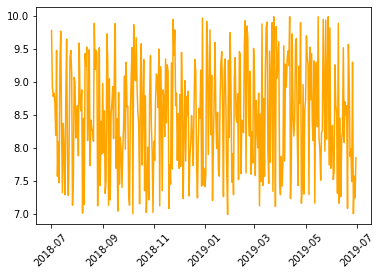

In [28]:
price = pd.read_csv(".\data_chap10\price.csv",header=0,index_col=0)

# 利用pandas把横坐标转为日期格式
price['日期'] = pd.to_datetime(price['日期'])
plt.plot(price['日期'][1:365], price['价格'][1:365], color='orange')
plt.xticks(rotation=45, fontsize=10)
plt.show()

**例：下图是1991年至2003年某车辆的乘客量的时序变化图**

Text(0, 0.5, '乘客量')

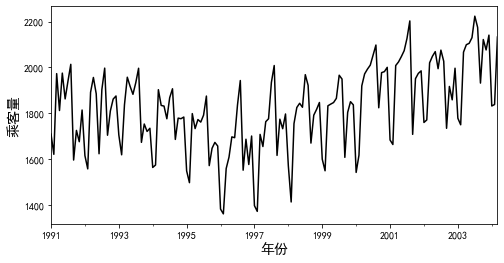

In [6]:
#data from https://github.com/reisanar/datasets
amtrak = pd.read_csv('.\data_chap10\Amtrak.csv', parse_dates=False,index_col='Month', squeeze=True)
amtrak.index = pd.to_datetime(amtrak.index, format='%d/%m/%Y')
amtrak = amtrak.resample('M').mean()

fig, ax = plt.subplots(figsize=[8, 4])
amtrak.plot(ax=ax, color='k')
ax.set_xlabel('年份', size=14)
ax.set_ylabel('乘客量', size=14)

时间序列分析与横断面数据分析有何不同？时间序列是复杂的，因为它的模式多种多样。为了说明，我们使用下面的玩具示例。

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as SP_STATS

In [2]:
import statsmodels.api as sm

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib notebook


Bad key "text.kerning_factor" on line 4 in
D:\anoconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
google_stock = pd.read_csv('.\data_chap10\GOOG.csv', date_parser='Date')
google_stock.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-13,816.000000,820.958984,815.489990,819.239990,819.239990,1213300
1,2017-02-14,819.000000,823.000000,816.000000,820.450012,820.450012,1054700
2,2017-02-15,819.359985,823.000000,818.469971,818.979980,818.979980,1313600


当我们获得时间序列数据时，我们总是想做的第一件事就是将其可视化。这对帮助我们理解数据非常有帮助。

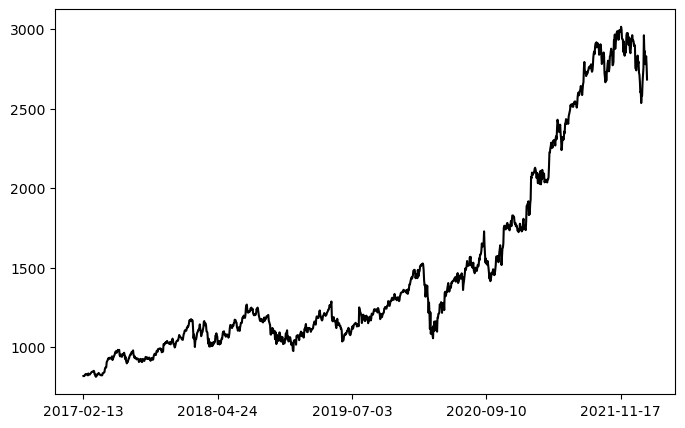

In [6]:
N_ticks = 5 # avoid tick labels being cluttered together
fig, ax = plt.subplots(figsize=[8,5])
ax.plot(google_stock.Date, google_stock.Close, color='k')
_ = ax.xaxis.set_major_locator(plt.MaxNLocator(N_ticks))

这里的第一个直觉是，它总体呈现上升的趋势。但我们还应该尝试捕获什么？总结这些时间序列的统计分布是值得关注的。

In [7]:
google_stock.describe().round()

,Open,High,Low,Close,Adj Close,Volume
count,1260.0,1260.0,1260.0,1260.0,1260.0,1260.0
mean,1487.0,1502.0,1473.0,1488.0,1488.0,1563063.0
std,619.0,624.0,613.0,618.0,618.0,696063.0
min,807.0,821.0,803.0,814.0,814.0,346800.0
25%,1071.0,1082.0,1059.0,1071.0,1071.0,1114875.0
50%,1207.0,1220.0,1200.0,1209.0,1209.0,1388250.0
75%,1731.0,1749.0,1717.0,1736.0,1736.0,1778525.0
max,3037.0,3042.0,2998.0,3014.0,3014.0,6207000.0


高于中值的平均值暗示了谷歌每日股价随时间的变化是分布不均衡的。

“自相关”这一术语对我们来说可能并不陌生，因为“相关”一词我们非常熟悉。
我们希望探索变量之间的相关性，我们可以调查时间序列目标随时间变化的程度。
换句话说，我们可以计算滞后时间序列数据之间的相关性。
从形式上讲，我们可以将自相关写成以下形式的自相关函数（ACF）：

$$ r_k=\frac{\sum_{t=k+1}^{T} (y_t-\bar{y})(y_{t-k}-\bar{y})}{\sum_{t=1}^T(y_t-\bar{y})^2} $$

其中$\bar{y}$是平均时间序列值$T$是时间序列的长度。直观地说，当$k$值较小时，该值捕捉相邻时间序列值之间的相关性，而当$k$值较大时，该值捕捉相距遥远的时间序列值间的相关性。为了了解ACF真正捕获的内容，让我们尝试使用谷歌每日股票数据计算自相关值。

In [8]:
# k=1
lag = 1
r_1 = sm.tsa.stattools.acf(google_stock['Adj Close'], nlags=lag, fft=True)[1]
print('The autocorrelation with lag of %i is %.3f'%(lag, r_1))

The autocorrelation with lag of 1 is 0.997


In [9]:
lag = 10
r_1_to_10 = sm.tsa.stattools.acf(google_stock['Adj Close'], nlags=lag, fft=True)[1:]
print(pd.DataFrame({'Lag': np.arange(lag)+1, 'ACF': r_1_to_10}))

   Lag       ACF
0    1  0.997104
1    2  0.994140
2    3  0.990928
3    4  0.987910
4    5  0.984961
5    6  0.981861
6    7  0.978885
7    8  0.975501
8    9  0.972772
9   10  0.970041


一种常见的做法是将其可视化，`statsmodels`在包中提供了此功能，以便于实现：

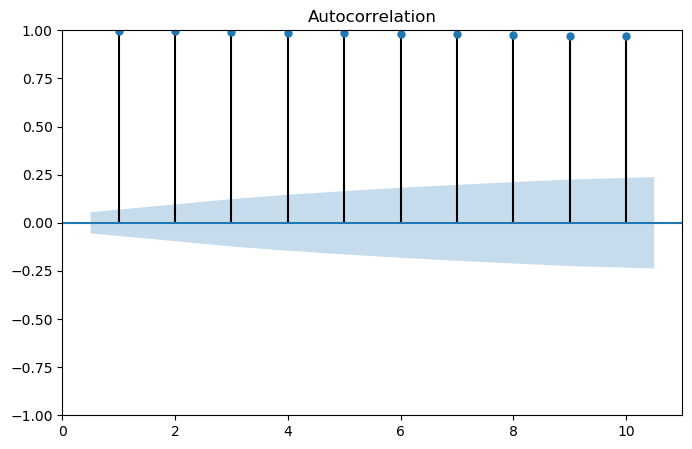

In [10]:
# the shaded region is the 95% CI
fig, ax = plt.subplots(figsize=[8, 5])
_ = sm.graphics.tsa.plot_acf(google_stock['Adj Close'], lags=lag, ax=ax, zero=False)

通常，如果我们使用更粗粒度的级别来捕获时间序列（或使用采样频率较低的时间序列），则为自相关

In [ ]:
fig, ax = plt.subplots(figsize=[8, 5])
_ = sm.graphics.tsa.plot_acf(google_stock.loc[np.arange(0, google_stock.shape[0], 30), 'Adj Close'],
                             lags=lag, zero=False, ax=ax)

为了更清楚地看到这一点，我们可以将上面的数字与使用随机噪声的数字进行比较，其中相关性落在置信区间内：

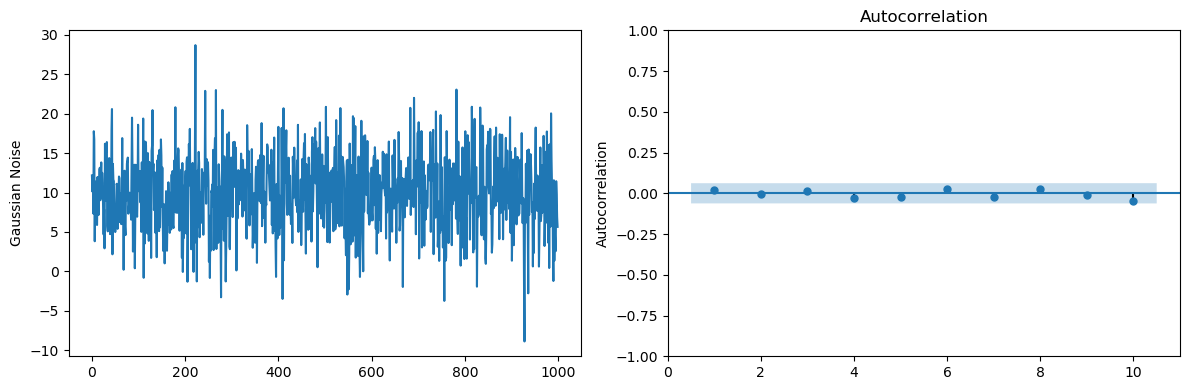

In [11]:
N_ts = 1000
random_ts = np.random.normal(loc=10, scale=5, size=N_ts) # standard normal
fig, (ax1, ax2) = plt.subplots(figsize=[12, 4], ncols=2)
ax1.plot(random_ts)
ax1.set_ylabel('Gaussian Noise')
sm.graphics.tsa.plot_acf(random_ts, lags=lag, ax=ax2, zero=False)
_ = ax2.set_ylabel('Autocorrelation')
fig.tight_layout()

**<font color='red'>平稳性</font>**

时间序列数据具有横截面数据中不存在的许多特征。一个关键特性是，时间序列的统计特征是否取决于该值的观测时间。
换句话说，如果有任何趋势或季节性模式，我们通常会说时间序列是非平稳的。如果我们查看谷歌股票收盘价的时间序列，我们可以很容易地确定它不是一个固定的时间序列。

尽管如此，如果我们观察其收盘价的变化，我们可能会看到不同的模式：

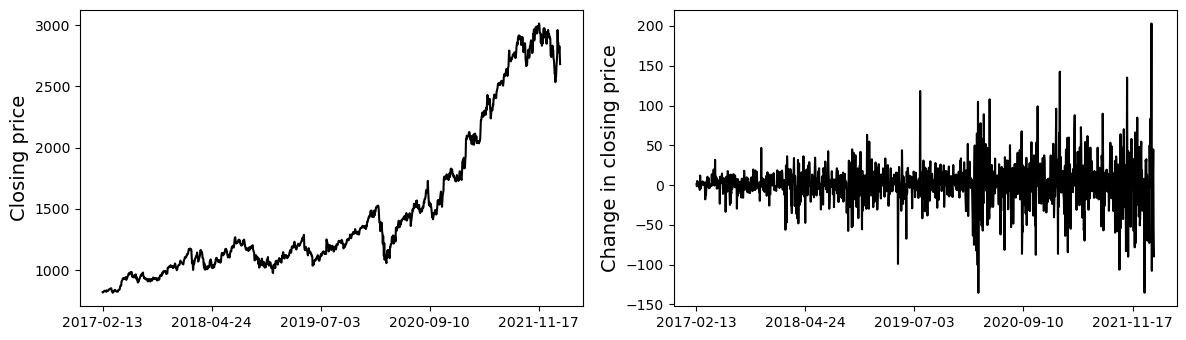

In [12]:
fig, (ax1, ax2) = plt.subplots(figsize=[12, 3.5], ncols=2)
ax1.plot(google_stock.Date, google_stock.Close, color='k')
ax1.set_ylabel('Closing price', size=14)
ax2.plot(google_stock.Date.values, google_stock.Close.diff(1), color='k')
ax2.set_ylabel('Change in closing price', size=14)
_ = ax1.xaxis.set_major_locator(plt.MaxNLocator(N_ticks))
_ = ax2.xaxis.set_major_locator(plt.MaxNLocator(N_ticks))
fig.tight_layout()

从视觉上，我们可以看出，右边的数字既没有明确的趋势，也没有季节性，暗示收盘价变化的平稳性。事实上，我们上面看到的高斯随机噪声也是平稳的。

除了通过图表检查平稳性，我们还可以使用统计检验。一个流行的测试是Kwiatkowski Phillips Schmidt-Shin（KPSS）测试，其原假设（$H_o$）是输入的时间序列数据是固定的。让我们将其应用于上述两个时间序列：

In [13]:
kpss_closing_price = sm.tsa.stattools.kpss(google_stock['Close'], nlags='auto')
print('Google closing price stationarity p-value: %.3f'%kpss_closing_price[1])

Google closing price stationarity p-value: 0.010


C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [14]:
kpss_change_price = sm.tsa.stattools.kpss(google_stock['Close'].diff(1)[1:], nlags='auto')
print('Google closing price change stationarity p-value: %.3f'%kpss_change_price[1])

Google closing price change stationarity p-value: 0.100


C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


## **10.1.2 时间序列的成分**

正如我们在上面的平稳性示例中所看到的，时间序列数据可能会或可能不会呈现出某些固定的模式。理论上，统计学家假设时间序列数据可以分解为三个部分：
- 季节项（Seasonality） $S_t$。现象在较长时期内受某种根本性因素作用而形成的总的变动趋势
- 趋势项（Trend） $T_t$。现象在一年内随着季节的变化而发生的有规律的周期性变动
- 随机部分（Remainder or randomness) $R_t$。是一种无规律可循的变动，包括严格的随机变动和不规则的突发性影响很大的变动两种类型。

两种常见的时间序列分解方法：
- 加法模型。当存在相对恒定的季节性或趋势（即，随时间推移而不变）时，可以使用此形式：
$$ y_t = S_t + T_t + R_t $$
- 乘法模型。这是为了弥补加法模型分解的缺点，当发现季节性或趋势项与时间序列水平（_time series scale_）成比例时，我们可以使用此方法:
$$ y_t = S_t \times T_t \times R_t $$

值得注意的是，这两种分解实际上是相通的，可以通过取对数从乘法模型转换为加法模型，因为：
$$ log(y_t) = log(S_t) + log(T_t) + log(R_t)$$

从谷歌的收盘价数据中，我们可以看到，随着时间的推移，价格走势有所不同，因为近年来上涨速度更快。因此，让我们尝试使用一种常用的名为_Season-Trend decomposition using LOESS_ (STL)的方法对数据进行乘法分解：

In [15]:
closing_price = google_stock.set_index('Date')[['Close']].copy()
closing_price.index = pd.to_datetime(closing_price.index)
# aggregate the time series by month
closing_price = closing_price.resample('M').mean()

In [16]:
stl_decomp = sm.tsa.STL(closing_price).fit()
stl_trend = stl_decomp.trend
stl_seasonal = stl_decomp.seasonal
stl_resid= stl_decomp.resid
stl_lines = {'Data': closing_price,
             'Seasonal': stl_seasonal,
             'Trend': stl_trend,
             'Remainder': stl_resid}

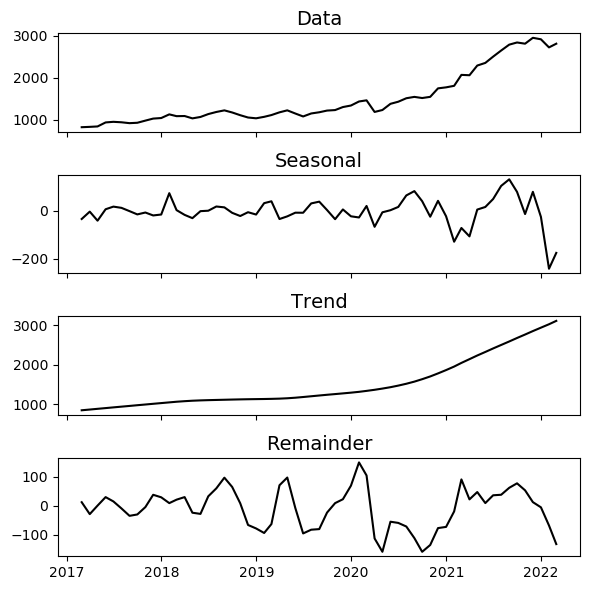

In [17]:
fig, ax_arr = plt.subplots(nrows=4, figsize=[6, 6], sharex=True, sharey=False)
for i, (y_lab, y_val) in enumerate(stl_lines.items()):
    ax = ax_arr.flat[i]
    ax.plot(y_val, color='k')
    ax.set_title(y_lab, size=14)
fig.tight_layout()

## **10.1.3 时间序列的预测步骤**

**1、观察观测值序列的特征，确定时间序列的类型。**<p>
**2、选择合适的方法建立预测模型。**如果时间序列<font color='red'>没有趋势和季节成分</font>，可选择<font color='red'>移动平均或指数平滑法</font>;<br />
    $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$如果时间序列<font color='red'>含有趋势成分</font>，可选择<font color='red'>趋势预测法</font>；<br />
    $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$如果时间序列含有<font color='red'>季节成分</font>，可选择<font color='red'>季节指数法</font>。<p>
**3、评价模型准确性，确定最优模型参数。**$$ MSE=\frac{1}{n}\sum_{t = 0} ^n(e^2_t)=\frac{1}{n}\sum_{t = 0} ^n(Y_t-F_t)^2$$<p>
**4、按要求进行预测。**<p>         

# **10.2 移动平均和指数平滑**

## **10.2.1 移动平均（Moving Average, MA）**

在探索了一些描述性时间序列的概念和性质之后，现在继续介绍预测：
- __我们如何根据历史模式预测未来目标值？__

从直观的角度来看，我们可能会认为目标值的任何变化都可能取决于当前状态。也许我们可以粗略估计下一个时间步骤的值基本上等于当前值：
$$ \hat{y_{t+1}} = y_t $$

虽然天真，但这实际上与我们在日常生活中的预测一致——看到比特币价格今天上涨，我们可能会猜测，第二天它可能会跟上这种上涨趋势。
换言之，我们仅仅依靠最近的观察而不是遥远过去的任何其他样本来推断历史模式。
嗯……也许这不合理。我们该怎么办？

我们可以收集更多的历史数据。稍加修改，我们可能会有一个稍微复杂一些的模型。移动平均法的原理即为用最近的数据预测未来短时间内的数据，例如简单移动平均法就是通过最近的一组数据求得平均，作为下一个时刻的预测值。该方法适用于围绕一个稳定水平上下波动的时间序列，其利用平均使各个时间点上的观测值中的随机因素互相抵消，以获得关于稳定水平的预测。<p>

**1.简单移动平均**。简单移动平均将包括当前时刻在内的N个时间点上的观测值的平均值作为对于下一时刻的预测值，其中N的选择应使得MSE这一预测误差达到最小。<p>
$$ \hat{y_{t+1}} = \frac{\sum_{t=t_o}^T y_t}{T-t_o+1} $$

其中$t_o$是我们在下一个时间序列中考虑的最远时间序列值。当$t_o=1$时，这相当于使用所有先前数据的平均值进行预测。

我们可以试试看它的表现如何。假设我们尝试两种不同的移动窗口长度，分别为3和5：

In [21]:
closing_price = google_stock.set_index('Date')[['Close']].copy()
closing_price.index = pd.to_datetime(closing_price.index)
aclosing_price = closing_price.resample('D').mean()

In [22]:
ma_windows = 3
closing_price_3 = [None] * ma_windows
for i in range(ma_windows, closing_price.size):
    closing_price_3.append(closing_price[i-ma_windows:i].mean())

In [23]:
ma_windows = 5
closing_price_5 = [None]*ma_windows + [closing_price[i-ma_windows:i].mean()\
                                       for i in range(ma_windows, closing_price.size)]

In [24]:
closing_price.size, len(closing_price_3), len(closing_price_5)

(1260, 1260, 1260)

D:\anoconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
D:\anoconda3\lib\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  order=order, subok=True, ndmin=ndmin)
D:\anoconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

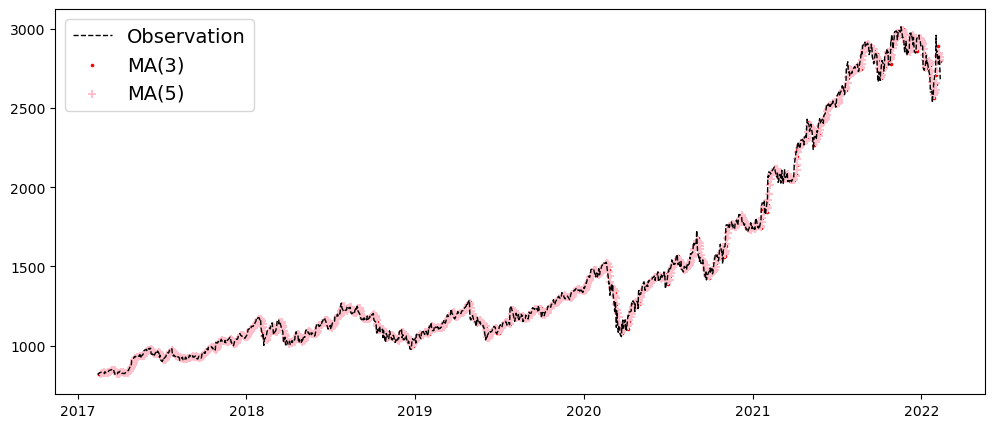

In [25]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.plot(closing_price.index, closing_price.values,
        linestyle='--', linewidth=1,
        label='Observation', color='k')
ax.scatter(closing_price.index, closing_price_3,
           label='MA(3)', s=10, marker='.', color='r')
ax.scatter(closing_price.index, closing_price_5,
           label='MA(5)', s=30, marker='+', color='pink')
_ = ax.legend(prop={'size': 14})

为了便于查看，我们改用每月收盘价

In [26]:
closing_price.index = pd.to_datetime(closing_price.index)
closing_price_monthly = closing_price['Close'].resample('M').mean()
closing_price_monthly.head(2)

Date
2017-02-28    825.980003
2017-03-31    834.111307
Freq: M, Name: Close, dtype: float64

In [27]:
ma_windows = 3
closing_price_3 = [None] * ma_windows
for i in range(ma_windows, closing_price_monthly.size):
    closing_price_3.append(closing_price_monthly[i-ma_windows:i].mean())

In [28]:
ma_windows = 5
closing_price_5 = [None]*ma_windows + [closing_price_monthly[i-ma_windows:i].mean()\
                                       for i in range(ma_windows, closing_price_monthly.size)]

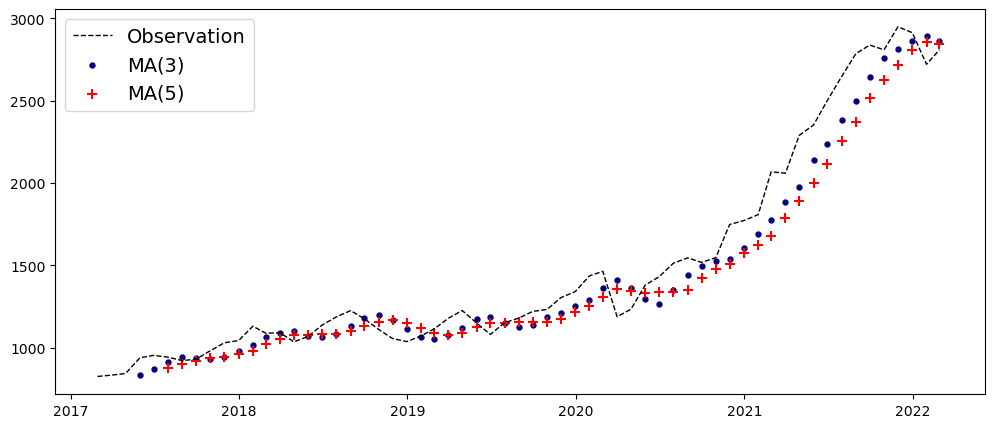

In [29]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.plot(closing_price_monthly.index,
        closing_price_monthly.values,
        linestyle='--', linewidth=1,
        label='Observation', color='k')
ax.scatter(closing_price_monthly.index, closing_price_3,
           label='MA(3)', s=50, marker='.', color='navy')
ax.scatter(closing_price_monthly.index, closing_price_5,
           label='MA(5)', s=50, marker='+', color='red')
_ = ax.legend(prop={'size': 14})

<font color='blue'>**【例10.2.1-1】**</font>:某汽油批发商在过去12周内汽油的销售数量如下表所示,下面用Python的简单移动平均来分析该数据，并预测13周汽油销量。

| 周 | 销量（千加仑） | 周 | 销量（千加仑） |
| :----: | :----:| :----: | :----: |
| 1 | 17 | 7 | 22 |
| 2 | 21 | 8 | 18 | 
| 3 | 19 | 9 | 22 | 
| 4 | 23 | 10 | 20 |
| 5 | 18 | 11 | 17 | 
| 6 | 20 | 12 | 22 |

**第一步，观察数据形状**<p>

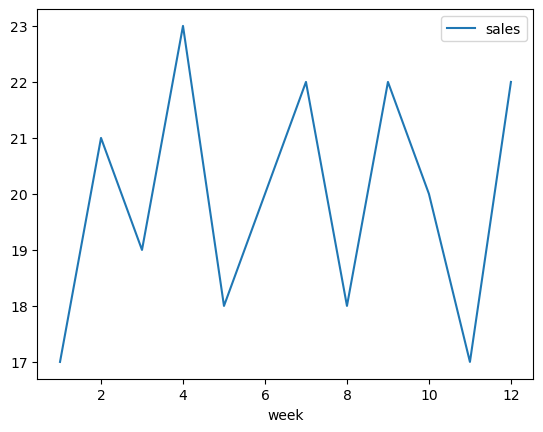

In [19]:
data = pd.read_excel(".\data_chap10\gas.xlsx",header=0)
data.plot(x='week',y='sales')

第二步，建立模型

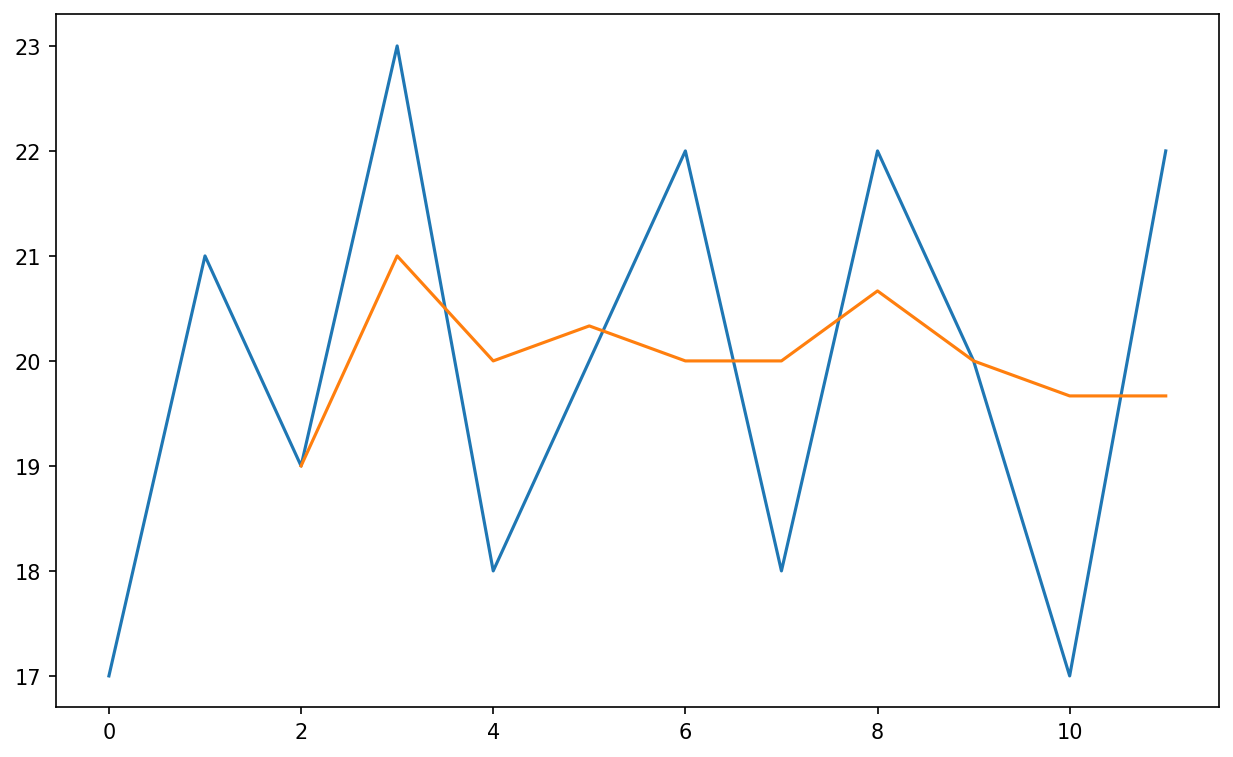

In [20]:
%matplotlib inline
plt.figure(figsize=(10,8),dpi=150)
data['sales'].plot(figsize=(10,6))
data['sales'].rolling(window=3).mean().plot()#window: 确定移动平均的步长

**2.加权移动平均**。简单移动平均的升级版为加权移动平均，即在各个时刻的数据上添加一个权重，考虑了不同时刻的数据对于未来预测值的影响大小不同。不同于机器学习模型中的优化算法，加权移动平均中的权重大小一般是根据经验法或试算法得到。
$$F_{t+1}=w_1Y_{t-1}+w_2Y_{t-2}+w_3Y_{t-3}+…+w_NY_{t-N}$$

## **10.2.2 指数平滑（Expoential Smoothing, ES）**

### 简单指数平滑

但另一个问题是确定一种适当的方法来衡量不同时间点的历史数据对未来目标的影响程度。我们的移动平均方法实际上是一种特定的情况，它对每个过去的数据应用相等的权重，而不管它们在给定的移动窗口内与当前的距离有多大。<p>
简单的全期平均法是对时间数列的过去数据一个不漏地全部加以同等利用；移动平均法则不考虑较远期的数据，并在加权移动平均法中给予近期资料更大的权重；而指数平滑法则兼容了全期平均和移动平均所长，不舍弃过去的数据，但是仅给予逐渐减弱的影响程度，即随着数据的远离，赋予逐渐收敛为零的权数。<p>
指数平滑法是在移动平均法基础上发展起来的一种时间序列分析预测法，任一期的指数平滑值都是本期实际观察值与前一期指数平滑值的加权平均。<p>
按照平滑次数的不同，指数平滑可以分为：一次指数平滑法、二次指数平滑法和三次指数平滑法等。

直觉上，我们可能希望比过去更重视最近的观察。基于这种启发式，我们有一个简单的指数平滑模型：

$$ \hat{y_{t+1}} =\alpha y_t + \alpha(1-\alpha)y_{t-1} + \alpha(1-\alpha)^2y_{t-2} + \ldots$$

其中$\alpha$是控制时间序列权重的平滑参数，该值越大，权重衰减的速度越快。为了更加清楚地明白$\alpha$的作用，我们可以使用各种$\alpha$值创建一个表：

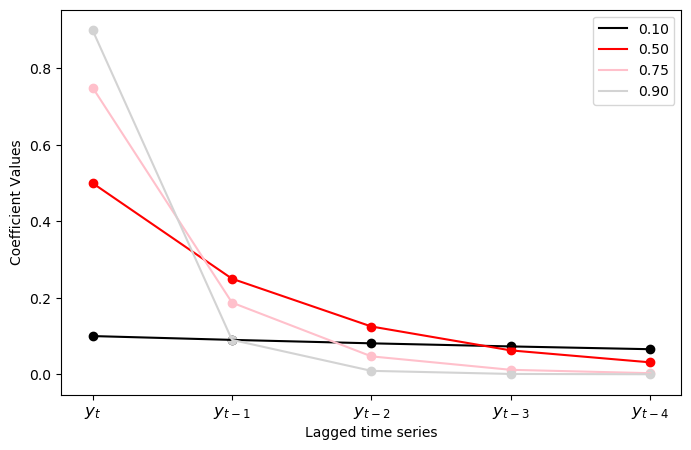

In [30]:
fig, ax = plt.subplots(figsize=[8, 5])
color_list = ['k', 'r', 'pink', 'lightgray']
for j, alpha in enumerate([0.1, 0.5, 0.75, 0.9]):
    alpha_list = list()
    for i in range(5): 
        coef_i = alpha*((1-alpha)**i)
        alpha_list.append(coef_i)
    ax.plot(range(5), alpha_list, label='%.2f'%alpha, color=color_list[j])
    ax.scatter(range(5), alpha_list, color=color_list[j])
ax.set_ylabel('Coefficient Values')
ax.set_xlabel('Lagged time series')
ax.set_xticks(range(5))
ax.set_xticklabels(['$y_t$'] + ['$y_{t-%i}$'%i for i in range(1,5)],
                   size=12)
ax.legend()

有时读者可能会看到一种简单指数平滑形式的替代公式，称为_component form_，它将模型分解为两个方程：
- 预测公式：$\hat{y_{t+1}} = l_t$，表示时间$t+1$的预测取决于时间$t$的_level_$l_t$。
- 平滑（或水平）方程：$l_t=\alpha y_t+ (1-\alpha)l_{t-1}$，表示时间$t$的水平与当前观测值以及过去的水平成一定的比例；$\alpha$是平滑参数。

通过迭代地将值换入到预测函数，我们可以得到与上述相同的方程：

$$
\begin{align}
\hat{y_{t+1}} &= \alpha y_t + (1-\alpha)l_{t-1}  \\
&= \alpha y_t + (1-\alpha)[\alpha y_{t-1} + (1-\alpha)l_{t-2}] \\
&= \alpha y_t + \alpha(1-\alpha)y_{t-1} + (1-\alpha)^2[\alpha y_{t-2} + (1-\alpha)l_{t-3}] \\
&= \ldots \\
&= \sum_{T} \alpha(1-\alpha)^{t-T} y_{T}
\end{align}
$$

考虑到包含权重参数$\alpha$，模型会有什么不同？让我们尝试使用 `statsmodels` 的 `tsa` 这一API来测试这一模型：

正如我们之后将看到的，所有指数平滑模型都可以聚合为一个广义时间序列模型，即误差趋势季节性（ETS）模型。在此示例中，我们将使用 `statsmodels` 中的 `ETSModel` 这一API：

In [34]:
sim_exp = sm.tsa.ETSModel(closing_price_monthly, error='add')
sim_exp = sim_exp.fit(closing_price_monthly)

In [33]:
# the smoothing parameter: rapid decay
sim_exp.alpha

0.9999

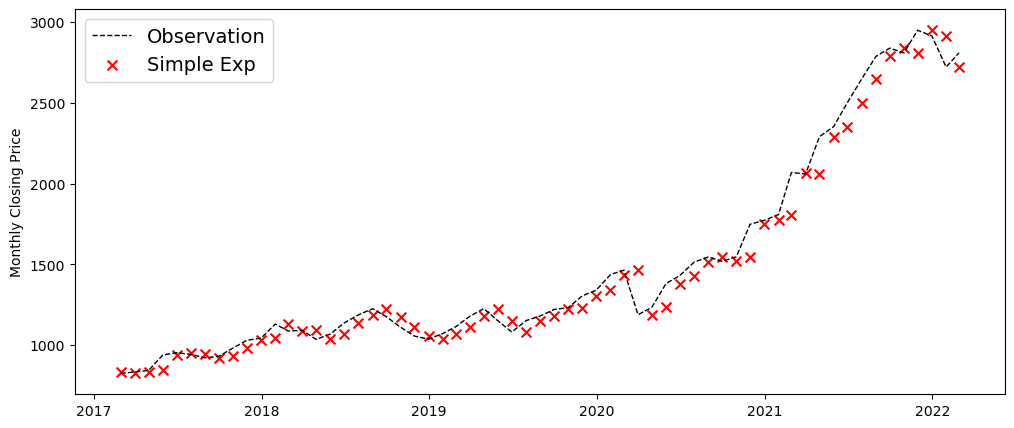

In [35]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.plot(closing_price_monthly.index, closing_price_monthly.values,
        linestyle='--', linewidth=1,
        label='Observation', color='k')
ax.scatter(closing_price_monthly.index, sim_exp.fittedvalues,
           label='Simple Exp', s=50, marker='x', color='red')
ax.set_ylabel('Monthly Closing Price')
_ = ax.legend(prop={'size': 14})

<font color='blue'>**【例10.2.2-1】**</font>：利用指数平滑模型来预测某一疾病未来5周的死亡率。

Text(0, 0.5, 'death ratio')

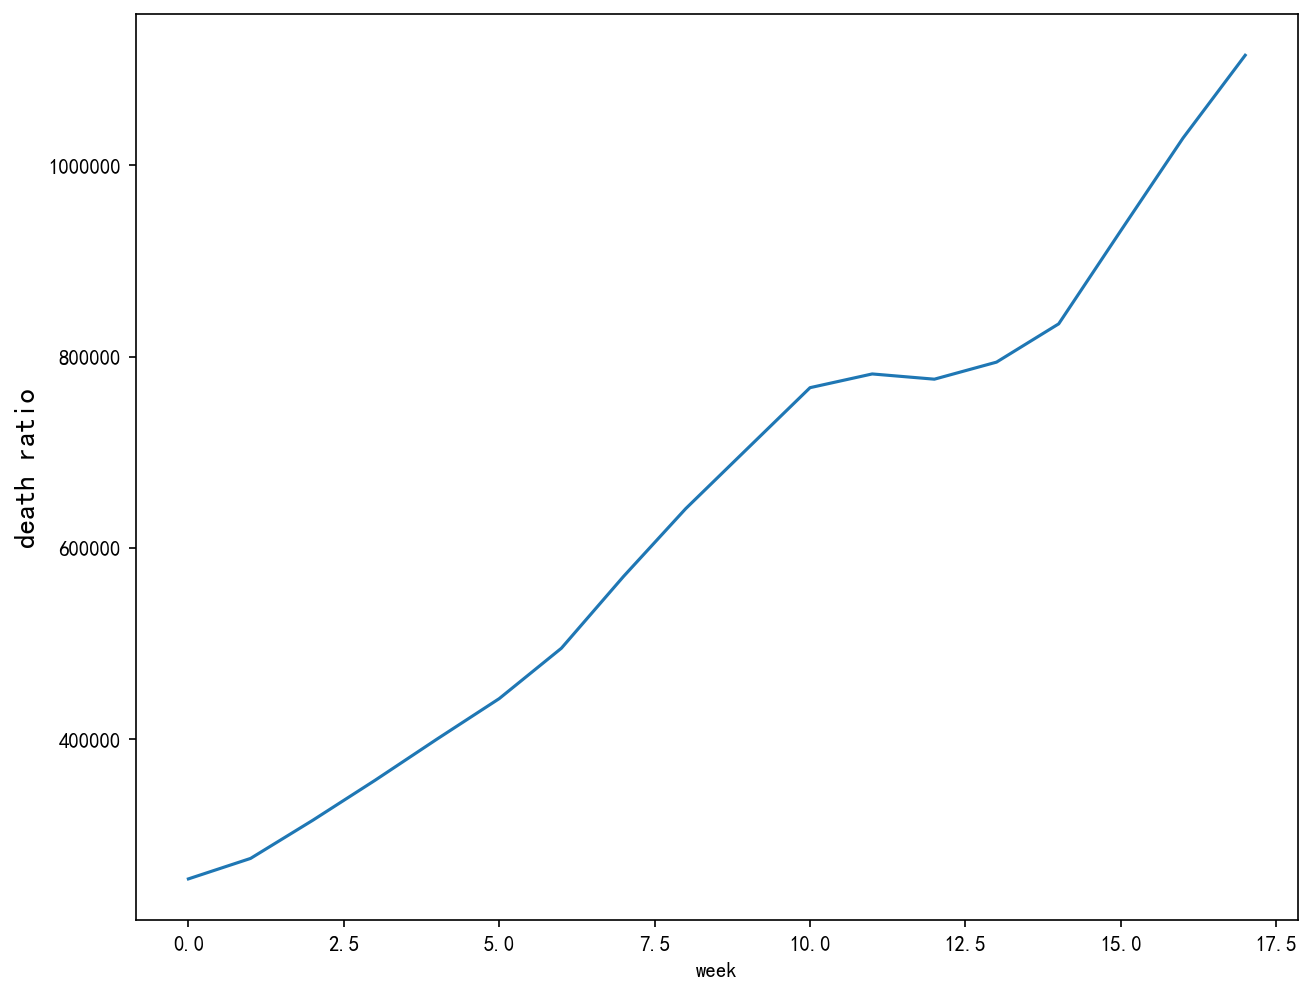

In [57]:
from matplotlib import pyplot as plt
####指数平滑
data = [253993,275396.2,315229.5,356949.6,400158.2,442431.7,495102.9,570164.8,640993.1,704250.4,767455.4,781807.8,776332.3,794161.7,834177.7,931651.5,1028390,1114914]
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) ##设置x轴坐标保持整数
plt.figure(figsize=(10,8),dpi=150)
plt.plot(data)
plt.xlabel('week') 
plt.ylabel("death ratio",size=14)

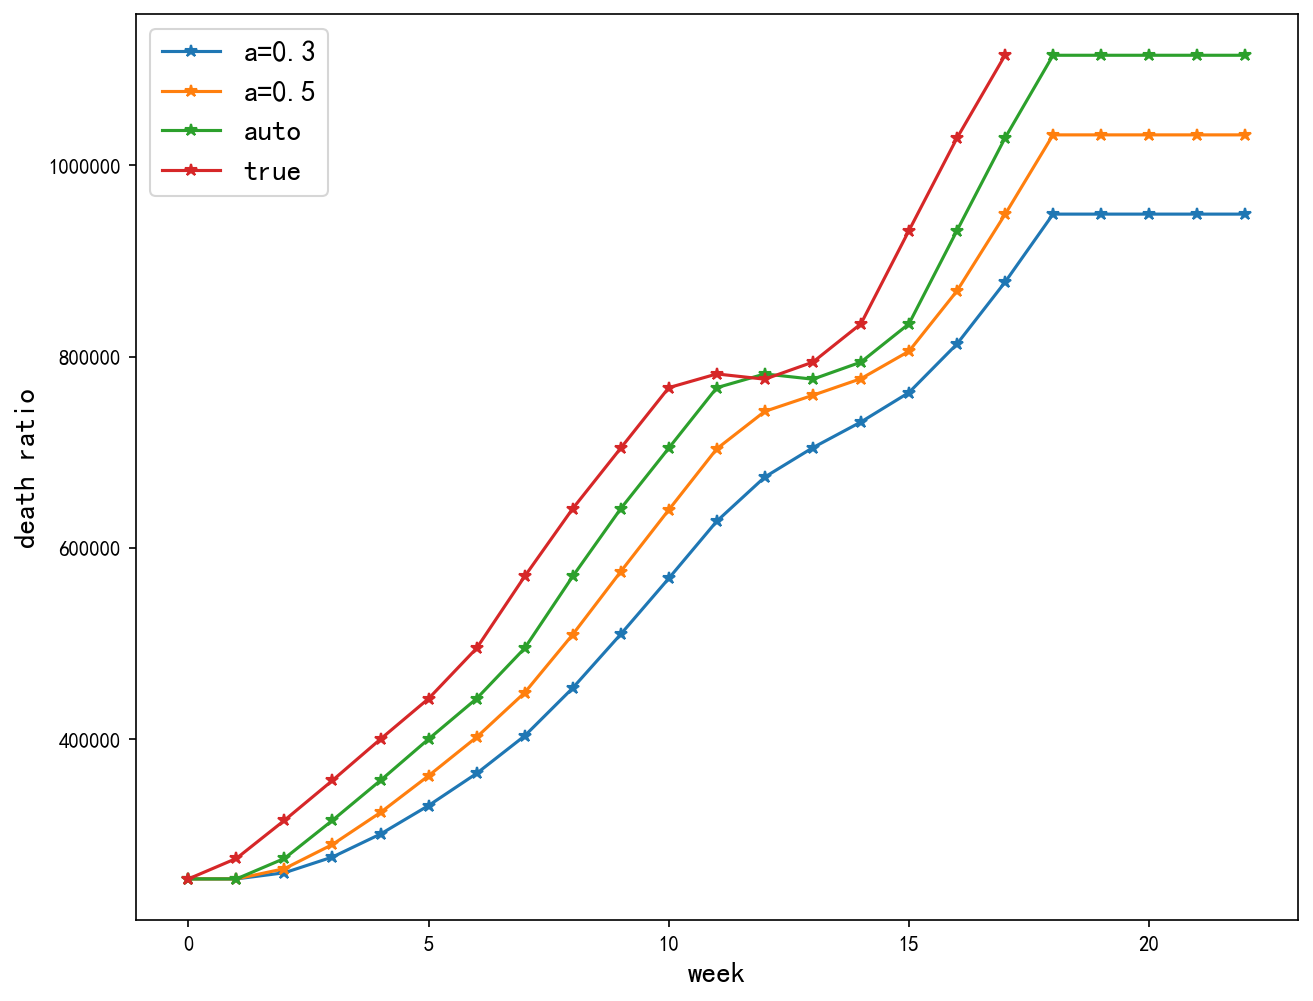

In [58]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, 
                                         SimpleExpSmoothing, 
                                         Holt)
##简单指数平滑模型 SES
plt.figure(figsize=(10,8),dpi=150)
##平滑参数α=0.3
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.3,optimized=False)
##plot
l1, = plt.plot(list(fit1.fittedvalues) + list(fit1.forecast(5)), marker='*')
###平滑参数α=0.5
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.5,optimized=False)
#plot
l2, = plt.plot(list(fit2.fittedvalues) + list(fit2.forecast(5)), marker='*')
###允许statsmodels自动寻找最优的平滑参数
fit3 = SimpleExpSmoothing(data).fit()
##plot
l3, = plt.plot(list(fit3.fittedvalues) + list(fit3.forecast(5)), marker='*')
l4, = plt.plot(data, marker='*')
plt.legend(handles = [l1, l2, l3, l4], labels = ['a=0.3', 'a=0.5', 'auto', 'true'], loc = 'best', prop={'size': 14})
plt.xlabel('week',size=14)
plt.ylabel("death ratio",size=14)
plt.show()

### 缺点：预测不准确

这两种简单的指数平滑方法都超越了加权平均的方法，在这种方法中，未来值的预测都被估计为最近的观测值。毫无疑问，这两种预测都存在一个关键问题：一个预测的结果是平稳的，即无论我们观察的距离有多远，预测值都是相同的。
使用数学语言，我们可以将其表述为：

$$ \hat{y_{t+h}} = \hat{y_{t+1}};~~h\geq2$$

换言之，无论我们尝试预测多远，我们都会得到相同的预测值，即等于对下一时间步的预测。这意味着这种预测假设给定时间序列数据中缺乏趋势或季节性成分。

### 10.2.3 捕获趋势: Holt's 模型 

可以通过什么方式使简单的指数模型更有用，以便它可以用来预测未来的价值？统计学家查尔斯·霍尔特（Charles Holt）提出了一个扩展，将趋势成分纳入模型。形式上，时间序列预测模型表示为：
- 预测方程: $\hat{y_{t+h}} = l_t + hb_t$
- 平滑方程: $ l_t = \alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1})$
- 趋势项: $b_t = \beta^{*}(l_t-l_{t-1}) + (1-\beta^{*})b_{t-1} $ 

其中有两个新参数：（i）$b_t$表示变化趋势或斜率，（ii）$\beta^{*}$是时间趋势$b_t$的平滑参数。回想一下，$\alpha$是控制权重衰减到过去的速度的平滑参数，而$l_t$是时间序列级别。虽然乍一看很奇怪，但逐一分解这些术语可以帮助我们更好地理解它。

首先，我们可以观察到平滑方程中的第二项是$l_{t-1}+b_{t-1}=\hat{y_{t}}$，因此：
$$ l_t=\alpha y_t +  (1-\alpha) \hat{y_t}$$
因此，时间序列水平$l_t$被测量为当前观测值与其预测值之间的加权平均值，该值的预测使用到了时间$t-1$之前的先验信息。

然后，我们继续分析趋势分量，这是当前水平变化和先前趋势估计之间的加权平均值：
$$ 
\begin{align}
b_t &=\beta^{*}(l_t-l_{t-1}) + (1-\beta^{*})[\beta^{*}(l_{t-1}-l_{t-2}) + (1-\beta^{*})b_{t-2}] \\
&= \beta^{*}(l_t-l_{t-1}) + \beta^{*}(1-\beta^{*})(l_{t-1}-l_{t-2}) + (1-\beta^{*})^2b_{t-2}
\end{align}
$$

这不是和简单的指数平滑一样吗？换句话说，该模型设计以与无任何趋势的指数平滑模型类似的方式来估计趋势分量：
$$ b_t= \sum_{T} \beta^{*}(1-\beta^{*})^{t-T} (l_{t-T} - l_{t-T-1}) $$

现在，由于$hb_t$一词的存在，对未来的预测将发生变化，而不是固定不变。具体而言，它将以$h$的速率线性增长，该值等于预测节点与当前时间节点相距的步长。

让我们看看它是如何实现的：

In [37]:
holt_exp = sm.tsa.ETSModel(closing_price_monthly, error='add', trend='add')
holt_exp = holt_exp.fit(closing_price_monthly, maxiter=1e5)

In [38]:
holt_exp.alpha, holt_exp.beta.round(6)

(0.9999, 0.0001)

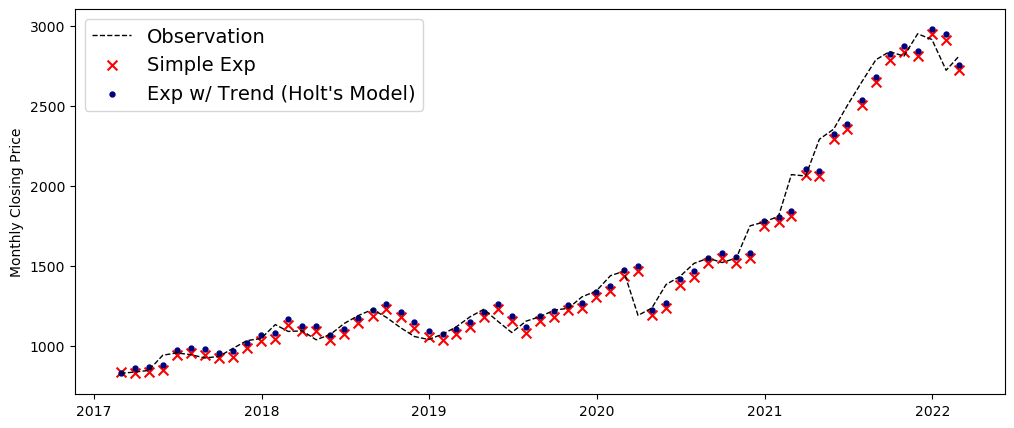

In [39]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.plot(closing_price_monthly.index, closing_price_monthly.values,
        linestyle='--', linewidth=1,
        label='Observation', color='k')
ax.scatter(closing_price_monthly.index, sim_exp.fittedvalues,
           label='Simple Exp', s=50, marker='x', color='red')
ax.scatter(closing_price_monthly.index, holt_exp.fittedvalues,
           label='Exp w/ Trend (Holt\'s Model)', s=50, marker='.', color='navy')
ax.set_ylabel('Monthly Closing Price')
_ = ax.legend(prop={'size': 14})

然后你可能会疑惑——这个趋势随着时间的推移是恒定的吗？可能不是，直觉和经验证据都发现了这样的证据，即预测模型的恒定趋势公式可能会过多地高估未来的趋势。
一个简单的补救方法是在趋势分量上添加另一个级别的_decay_nameas作为_damping参数_$\phi\in（0,1）$，从而将三个方程更改为：
- 预测方程: $\hat{y_{t+h}} = l_t + (\phi+\phi^2+\ldots+\phi^h)b_t$
- 平滑方程: $ l_t = \alpha y_t + (1-\alpha) (l_{t-1} + \phi b_{t-1})$
- 趋势项: $b_t = \beta^{*}(l_t-l_{t-1}) + (1-\beta^{*})\phi b_{t-1} $ 

如果我们设置$\phi=1$，即对趋势常数完全没有阻尼，那么这就等同于原本的Holt's 模型。
此外，请注意，随着我们的逐步深入，我们会发现趋势效应将随着时间的推移而降低。

In [40]:
holt_exp_damped = sm.tsa.ETSModel(closing_price_monthly, error='add', trend='add', damped_trend=True)
holt_exp_damped = holt_exp_damped.fit(closing_price_monthly, maxiter=1e5, disp=False)

In [41]:
holt_exp_damped.alpha, holt_exp_damped.beta.round(6), holt_exp_damped.phi

(0.9999, 0.087523, 0.98)

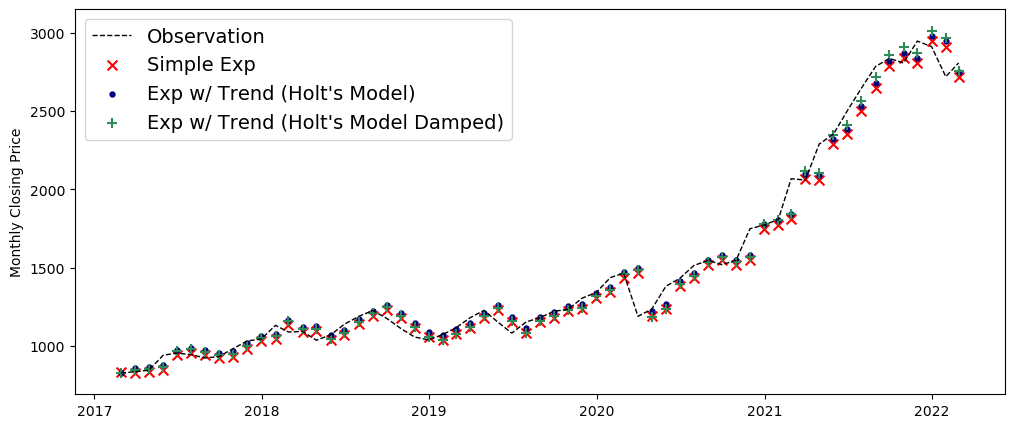

In [42]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.plot(closing_price_monthly.index, closing_price_monthly.values,
        linestyle='--', linewidth=1,
        label='Observation', color='k')
ax.scatter(closing_price_monthly.index, sim_exp.fittedvalues,
           label='Simple Exp', s=50, marker='x', color='red')
ax.scatter(closing_price_monthly.index, holt_exp.fittedvalues,
           label='Exp w/ Trend (Holt\'s Model)', s=50, marker='.', color='navy')
ax.scatter(closing_price_monthly.index, holt_exp_damped.fittedvalues,
           label='Exp w/ Trend (Holt\'s Model Damped)', s=60, marker='+', color='SeaGreen')
ax.set_ylabel('Monthly Closing Price')
_ = ax.legend(prop={'size': 14})

### 10.2.4 趋势加季节项: Winter's 方法

你可能会问，我们可以向模型中添加更多的部分或组件吗？回想一下，理论上，时间序列数据集可以分解为三个部分：（i）季节性；（ii）趋势；（iii）剩余部分（它可能包括随机噪声和由于模型缺陷而未捕获的部分）。显然，只有一件事是我们没有尝试的，即季节项。

我们将这个模型合并的方式是在预测框架中添加另一层。
然而，在我们尝试将季节性引入模型之前，需要注意添加的机制。
回想一下，时间序列分解有两种类型：（i）加法和（ii）乘法，其选择取决于季节性如何发挥作用。
具体来说，如果时间序列以季节性不变的方式变化，则前者可能更好，反之亦然。
因此，我们可以为这两种情况引入两种指数平滑方法。
注意，季节性是指一年中的时间序列模式。如果我们关注季度变化，我们可以将其设置为$m=4$。同样，如果我们关注月度变化，那么$m=12$。

#### 加法模型

当加法模型更合适时，我们将考虑趋势和季节性的扩展模型写成：
- 预测方程: $ \hat{y_{t+h}} =l_t + hb_t + s_{t+h-m} $
- 平滑方程: $l_t = \alpha(y_t - s_{t-m}) + (1-\alpha) (l_{t-1} + b_{t-1})$
- 趋势项: $b_t = \beta^{*}(l_t-l_{t-1}) + (1-\beta^{*}) b_{t-1} $
- 季节性: $s_t = \gamma(y_t-l_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m}$

从$s_{t+h-m}$的下标中，我们可以推断这是指最近时间点（与目标预测时间点有关）的季节性分量。<p>
对我自己来说，一开始看到这些方程式，我就觉得它不是那么直观。因此，为了更好地理解，我们可以用具体的数字代替字母。

现在，假设我们的数据呈现出季度的变化，即每一个$t$单位为一个季度（即3个月）。
然后，我们将设置$m=4$，因为一年有四个季度。现在，假设我们提前一步进行预测——$h=1$。将所有这些代入上述方程，我们得到（我们跳过了基本水平的方程，因为它不涉及季节性）：
- 预测方程: $ \hat{y_{t+1}} =l_t + b_t + s_{t-3} $
    - This is giving us clear evidence that the one-step ahead forecast $\hat{y_{t+1}}$ is the sum of the base level, the trend values of the most recent time point $t$ as well as that of the same seasonality which is at $t+1-4=t-3$.
- 平滑方程: $l_t = \alpha(y_t - s_{t-4}) + (1-\alpha) (l_{t-1} + b_{t-1})$
    - The second term $l_{t-1} + b_{t-1}=\hat{y_t}-s_{t-4}$ and thus $l_t = \alpha(y_t - s_{t-4}) + (1-\alpha)(\hat{y_t}-s_{t-4})$ such that the base is a weighted average of the de-seasoned observation and forecast at time $t$.
- 季节项: $s_t = \gamma(y_t-l_{t-1}-b_{t-1}) + (1-\gamma)s_{t-4}$
    - The first term $y_t-l_{t-1}-b_{t-1}$=$y_t-(\hat{y_t}-s_{t-4})$ and thus $s_t = \gamma(y_t-\hat{y_t}+s_{t-4}) + (1-\gamma)s_{t-4}=\gamma(y_t-\hat{y_t})+s_{t-4}$, which is the sum of forecast error on time $t$ and the past season. A smaller $\gamma$ is equivalent to a more stable seasonality.

#### 乘法模型

如果我们认为季节性随时间而变化，那么加法模型是不合适的。相反，我们可以通过将季节性作为等式中的乘法项来获得第二种公式，从而：
- 预测方程: $ \hat{y_{t+h}} = (l_t + hb_t)s_{t+h-m} $
- 平滑方程: $l_t = \alpha \dfrac{y_t}{s_{t-m}} + (1-\alpha) (l_{t-1} + b_{t-1})$
- 趋势项: $b_t = \beta^{*}(l_t-l_{t-1}) + (1-\beta^{*}) b_{t-1} $
- 季节性: $s_t = \gamma\dfrac{y_t}{l_{t-1}+b_{t-1}} + (1-\gamma)s_{t-m}$

值得注意的是，趋势和季节性成分在不同机制下被纳入方程中——趋势被建模为加法，而季节性被建模为乘法。

<font color='blue'>**【例10.2.4-1】**</font>

In [44]:
winter_exp_add = sm.tsa.ETSModel(closing_price_monthly, error='add',
                                 trend='add',damped_trend=True,
                                 seasonal='add', seasonal_periods=12)
winter_exp_add = winter_exp_add.fit(maxiter=1e5, disp=False)

In [45]:
winter_exp_add.gamma

9.999999999998898e-09

In [46]:
winter_exp_mul = sm.tsa.ETSModel(closing_price_monthly, error='add',
                                 trend='add', damped_trend=True,
                                 seasonal='mul', seasonal_periods=12)
winter_exp_mul = winter_exp_mul.fit(maxiter=1e5, disp=False)

In [47]:
winter_exp_mul.gamma

9.999999999998898e-09

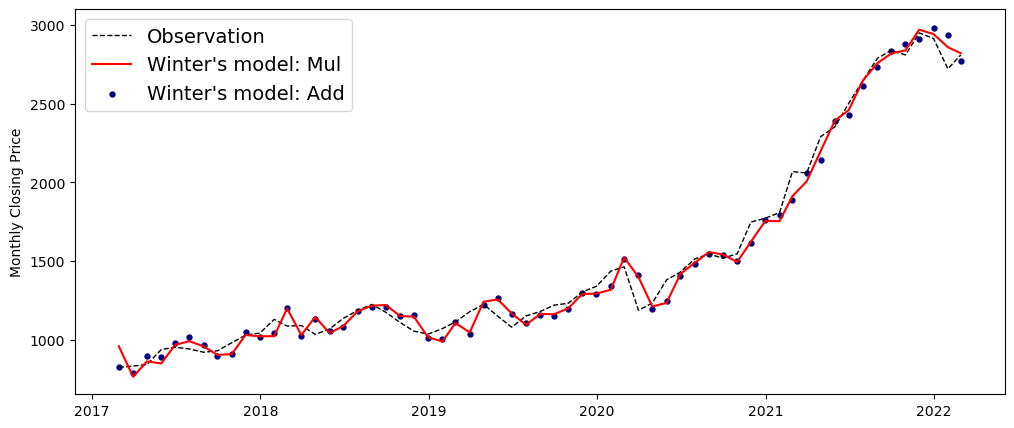

In [48]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.plot(closing_price_monthly.index, closing_price_monthly.values,
        linestyle='--', linewidth=1,
        label='Observation', color='k')
ax.scatter(closing_price_monthly.index, winter_exp_add.fittedvalues,
           label='Winter\'s model: Add', s=50, marker='.', color='navy')
ax.plot(closing_price_monthly.index, winter_exp_mul.fittedvalues,
           label='Winter\'s model: Mul', color='r')
ax.set_ylabel('Monthly Closing Price')
_ = ax.legend(prop={'size': 14})

## 有一部分evaluation的内容，要加吗？

# **10.3 趋势预测模型 （一元线性与非线性回归分析与预测）**

## **10.3.1 线性趋势**

对于含有线性趋势成分的时间序列，可以将预测变量在每一个时期的值和其对应时期之间的线性依赖关系表示为：

$$\hat{Y}=a+bX$$

利用使均方误差MSE极小的原则确定系数**a**与**b**，就可得到直线趋势方程，以此求得每一个**Xi**所对应的预测值:

$$\hat{Y_i}=a+bX_i$$

对于一元线性回归的分析和预测，在Python中可以调用scikit-learn库的LinearRegression()函数实现。

<font color='blue'>**【例10.3.1-1】**</font>：某航空公司10年间的年总收入数据如下表所示，试建立线性趋势预测模型并预测第11年的年总收入。

| 年序号 | 总收入 | 年序号 | 总收入 |
| :----: | :----:| :----: | :----: |
| 1 | 2428 | 6 | 4264 |
| 2 | 2951 | 7 | 4738 | 
| 3 | 3533 | 8 | 4920 | 
| 4 | 3618 | 9 | 5318 |
| 5 | 3616 | 10 | 6715 | 

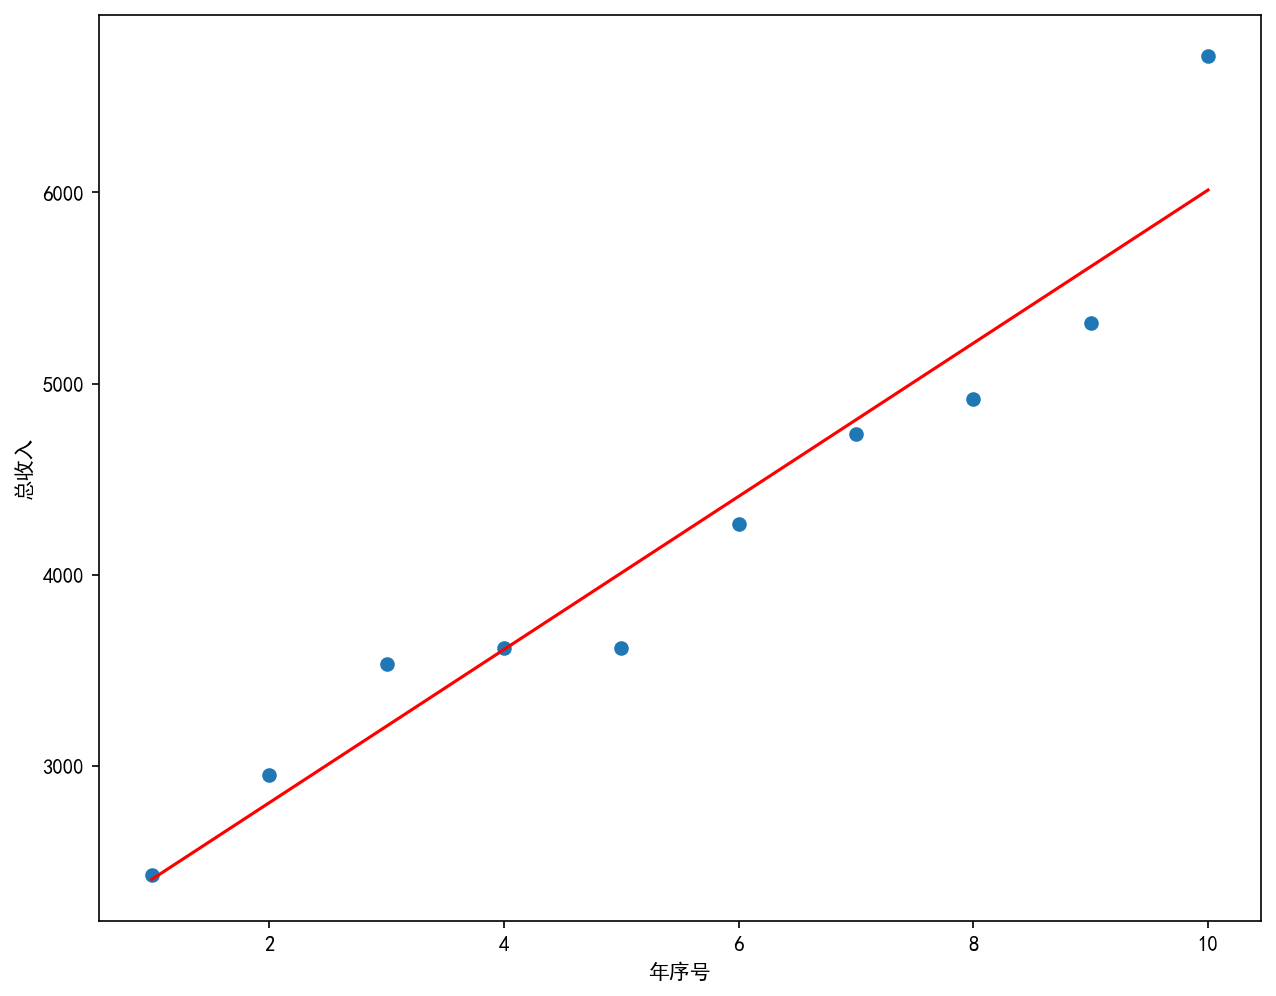

回归系数为400.576,截距项为2006.933


D:\anoconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\anoconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    总收入   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           6.17e-06
Time:                        10:54:08   Log-Likelihood:                -71.616
No. Observations:                  10   AIC:                             147.2
Df Residuals:                       8   BIC:                             147.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2006.9333    238.203      8.425      0.000    1457.637    2556.230
年序号          400.5758     38.390     10.434      0.000     312.049     489.103
==============================================================================
Omnibus:                        3.338   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                1.312
Skew:                           0.886   Prob(JB):                        0.519
Kurtosis:                       3.108   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression

da1 = [1,2,3,4,5,6,7,8,9,10]
da2 = [2428,2951,3533,3618,3616,4264,4738,4920,5318,6715]
df1 = pd.DataFrame(da1)
df2 = pd.DataFrame(da2)
data = pd.concat([df1,df2],axis=1) 
data.columns = ['年序号','总收入']

X = data[['年序号']]
Y = data['总收入']

# 模型搭建
model = LinearRegression()
model.fit(X,Y)
# 模型可视化
plt.figure(figsize=(10,8),dpi=150)
plt.scatter(X,Y)
plt.plot(X,model.predict(X),color='red')
plt.xlabel('年序号')
plt.ylabel('总收入')
plt.show()
 
#查看系数,截距：线性回归方程构造
print("回归系数为%.3f,截距项为%.3f"%(model.coef_[0],model.intercept_))

import statsmodels.api as sm
 
# add_constant()函数给原来的特征变量X添加常数项，并赋给X2，这样才有y＝ax＋b中的常数项，即截距b
X2 = sm.add_constant(X)
# 用OLS()和fit()函数对Y和X2进行线性回归方程搭建
est = sm.OLS(Y,X2).fit()
est.summary()


In [35]:
# 预测
print("第11年的总收入预测值为：%.2f"%(model.predict([[11]])[0]))

第11年的总收入预测值为：6413.27


## **10.3.2 非线性趋势<font color='red'>(需要补充)</font>**

对于非线性，同样可以转化为线性关系，再进行预测。


# **10.4 季节模型**

对于既含有线性趋势成分又含有季节成分的时间序列，须对其成分进行分解，分解模型可以分为加法模型和乘法模型。

《时间序列分析》

## **10.4.1 季节加法模型**

$$Y_t = T_t + S_t + C_t + I_t$$
其中，$T_t$表示趋势成分，$S_t$表示季节成分，$I_t$表示不规则成分。由于不规则成分的不可预测，因此预测值就可表示为趋势成分和季节成分的乘积。<p>
建立季节指数模型的一般步骤如下：<br>
**·**第一步，计算每一季（每季度，每月等等）的季节指数$S_t$；<br>
**·**第二步，用时间序列的每一个观测值除以或减掉适当的季节指数，消除季节影响；<br>
**·**第三步，为消除了季节影响的时间序列建立适当的趋势模型并用这个模型进行预测；<br>
**·**第四步，用预测值乘以或加上季节指数，计算出最终的带季节影响的预测值。 <p>

## **10.4.2 季节乘法模型**

这种分解建立在以下乘法模型的基础上,其中，$T_t$表示趋势成分，$S_t$表示季节成分，$I_t$表示不规则成分。<br>
由于不规则成分的不可预测，因此预测值就可表示为趋势成分和季节成分的乘积。

$$Y_t = T_t × S_t × C_t × I_t$$
乘法模型可以通过取对数变换为加法模型。
$$log(Y_t)=log(T_t)+log(S_t)+log(C_t)+log(I_t)$$

## **10.4.3 混合模型**

$$Y_t = T_t × C_t × S_t + I_t$$
$$Y_t = T_t + C_t × S_t × I_t$$

<font color='blue'>**【例10.3-1】**</font>：美国1949年到1960年每月的航班乘客数量如下图所示，这些数据有明显的季节性波动和趋势性。试预测未来一年内的乘客数量。

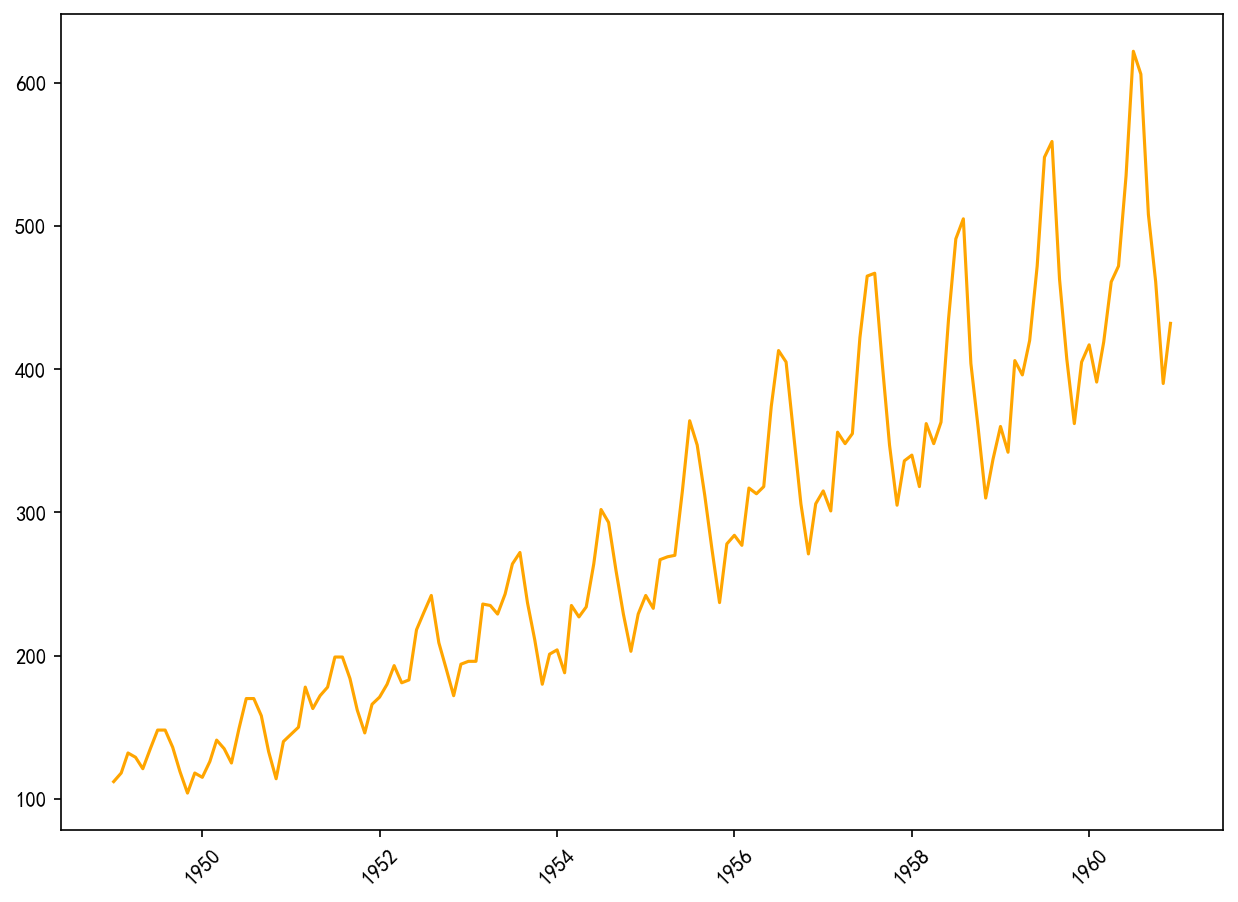

In [69]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


data = read_csv('.\data_chap10\passengers.csv')
# data.index=pd.to_datetime(data['month'],format='%Y-%m')##设置索引列为时间索引
data['month'] = pd.to_datetime(data['month'])

fig = plt.figure(figsize=(10,8),dpi=150)
# 设置 x 轴显示密度
fig.autofmt_xdate()
plt.plot(data['month'], data['passenger'], color='orange')
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [ ]:

##时间序列分解
# 调用seasonal_decompose方法，实现时间序列分解
decompose_result = seasonal_decompose(data['passenger'], model="multiplicative")
decompose_result.plot()
plt.show()

**查看时间序列分解后的结果**<br>

In [41]:
print((decompose_result.seasonal))

month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: passenger, Length: 144, dtype: float64


## 季节指数预测实例

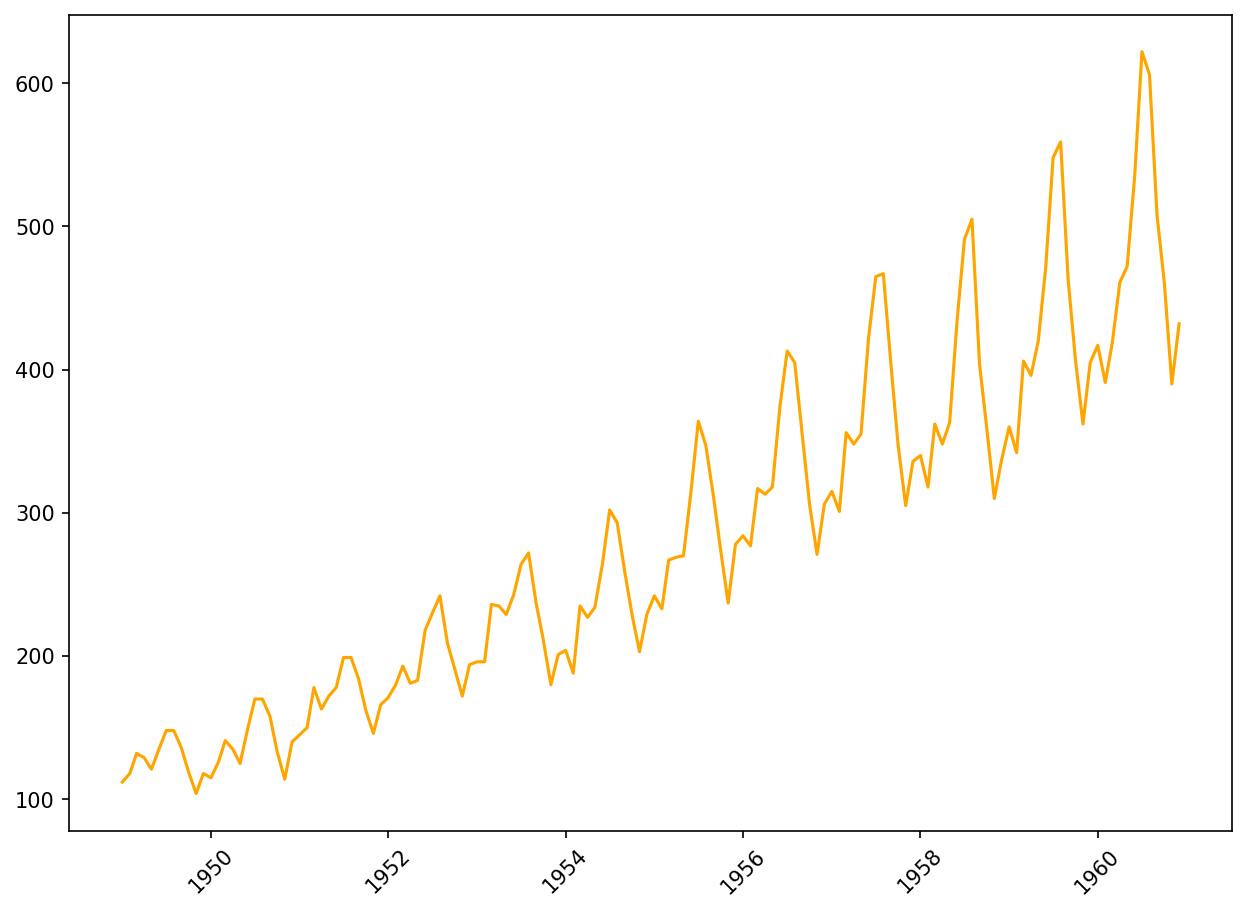

In [2]:
from pandas import read_csv
import pandas as pd
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = read_csv('.\data_chap10\passengers.csv')
# data.index=pd.to_datetime(data['month'],format='%Y-%m')##设置索引列为时间索引
data['month'] = pd.to_datetime(data['month'])

fig = plt.figure(figsize=(10,8),dpi=150)
# 设置 x 轴显示密度
fig.autofmt_xdate()
plt.plot(data['month'], data['passenger'], color='orange')
plt.xticks(rotation=45, fontsize=10)
plt.show()

<Figure size 720x288 with 0 Axes>

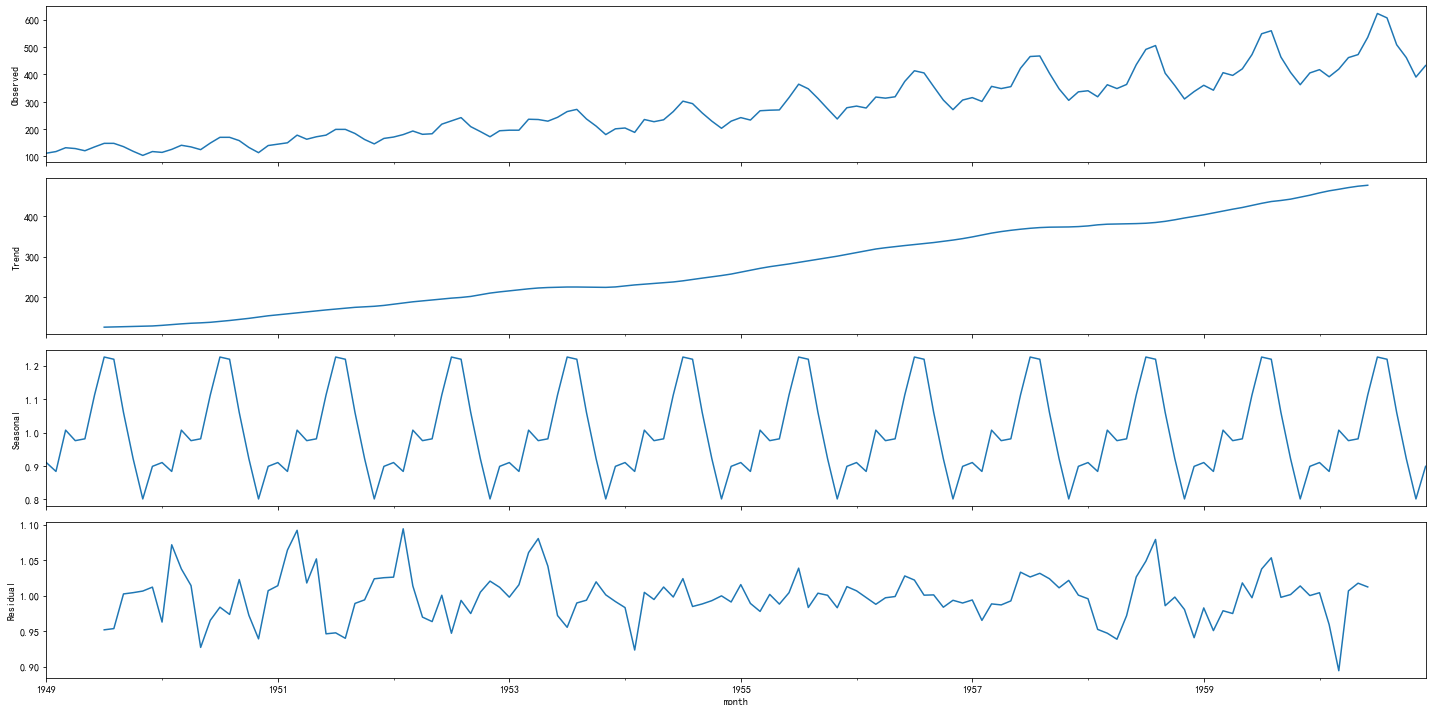

In [87]:
# data.index=pd.to_datetime(data['month'],format='%Y-%m')##设置索引列为时间索引
# data.drop('month',axis=1,inplace=True)

fig = plt.figure(figsize=(10,4))
# 用seasonal_decompose()函数来分解季节成分
decompose_result = seasonal_decompose(data['passenger'], model="multiplicative")
plt.rcParams['figure.figsize'] = 20, 10
fig=decompose_result.plot()
# decompose_result.plot()
plt.show()

D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


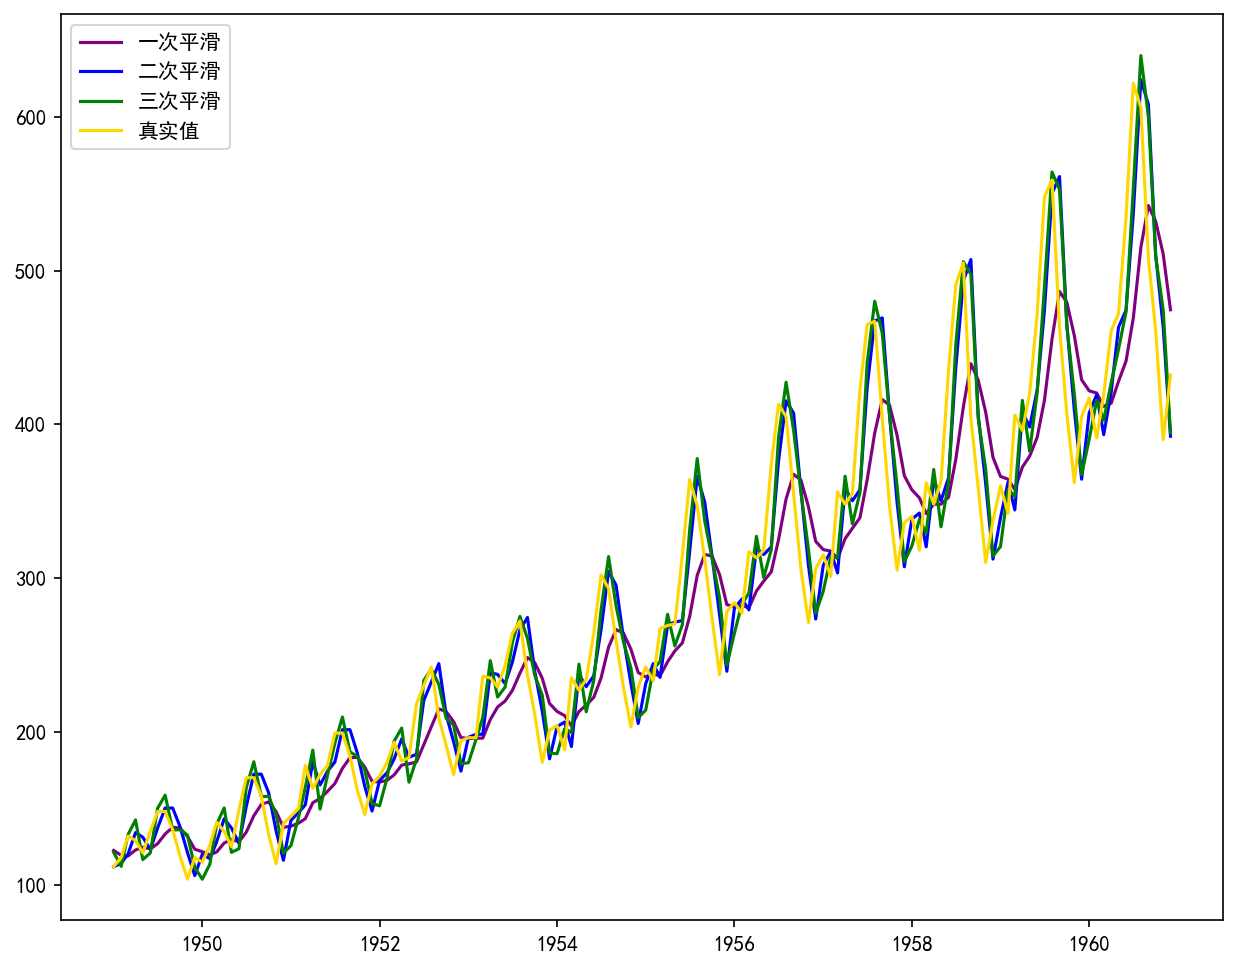

In [51]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, 
                                         SimpleExpSmoothing, 
                                         Holt)
# 拟合模型
plt.figure(figsize=(10,8),dpi=150)
data["1exp"] = SimpleExpSmoothing(data["passenger"]).fit(smoothing_level=0.3).fittedvalues
data["2exp_add"] = ExponentialSmoothing(data["passenger"], trend="add", seasonal=None).fit().fittedvalues
data["3exp_add"] = ExponentialSmoothing(data["passenger"], trend="add", seasonal="add",seasonal_periods=4).fit().fittedvalues##季节周期性为4，加法模型
plt.plot(data["1exp"],color='purple',label='一次平滑')
plt.plot(data["2exp_add"],color='blue',label='二次平滑')
plt.plot(data["3exp_add"],color='green',label='三次平滑')
plt.plot(data["passenger"],color='gold',label='真实值')
plt.legend ()
plt.show()

分别采用简单指数平滑，二次指数平滑和三次指数平滑进行预测，拟合结果显示，**三次平滑**较好。<p>
    
 **预测未来一年内的乘客数量**

D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


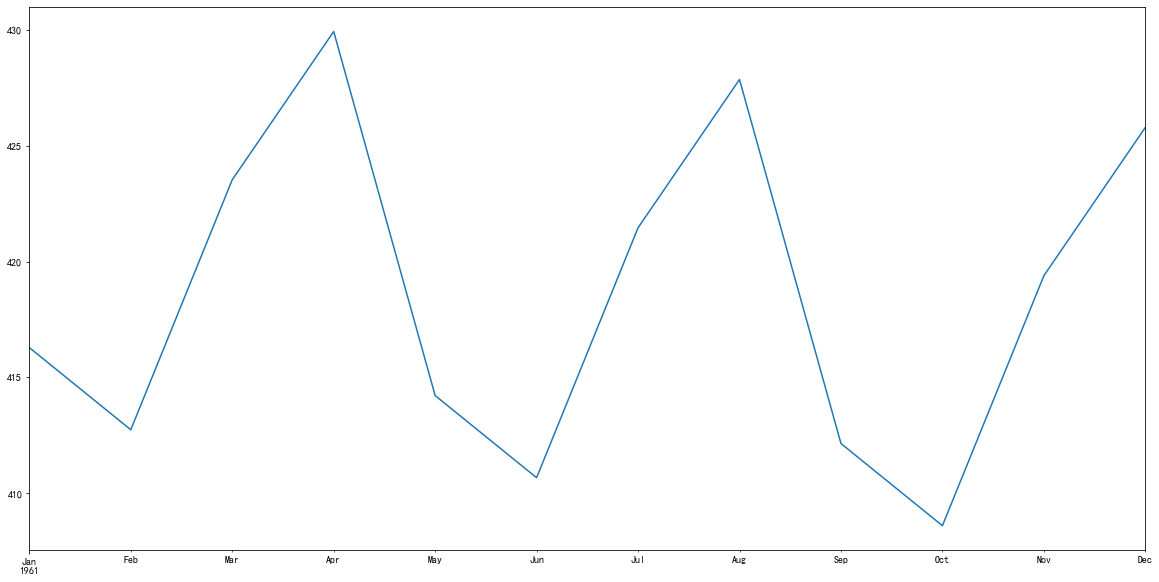

In [90]:
# 预测
model = ExponentialSmoothing(data['passenger'], trend='add', seasonal='add',seasonal_periods=4).fit()##加法模型
pred = model.forecast(12)###预测未来一年的客流量
pred.plot()

# **10.5 ARIMA模型**

## **10.5.1 自相关和偏自相关**

统计中的相关性说的是两个变量间的相关程度。我们假设如果每个变量都符合正态分布，可以使用皮尔逊相关系数（Pearson correlation coefficient）来统计变量间的相关性。<p>
自相关（Autocorrelation）：也叫序列相关，是一个信号于其自身在不同时间点的互相关。自相关用来度量一个序列不同滞后阶数的衰减趋势。<p>
    **K阶自相关函数（ACF）**：$$\rho_k=\rho(t,s)=\frac{COV(X_t,X_t-k)}{\sqrt{DX_t}\sqrt{DX_{t+k}}},k=t-s$$<p>
偏自相关（Partial Autocorrelation）：偏自相关是剔除干扰后时间序列观察与先前时间步长时间序列观察之间关系的总结，偏相关函数用来考察剔除$𝑋_𝑡$与$𝑋_{𝑡+𝑘}$中间序列$𝑋_{𝑡+1},𝑋_{𝑡+2},…,𝑋_{𝑡+𝑘−1}$的干扰后，时间序列$𝑋_𝑡$与$𝑋_{𝑡+𝑘}$之间的相关性。<p>
**K阶偏相关函数（PACF）**：$$\varphi_k=\frac{COV[(X_t,\hat{X_t}),(X_{t+k},\hat{X_{t+k}})]}{D(X_{t+k}-\hat X_{t+k})}$$   

In [54]:
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats as SP_STATS

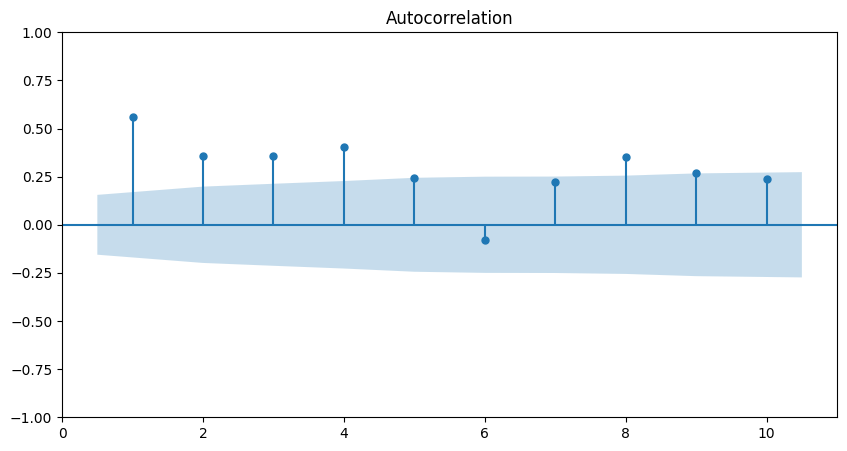

In [6]:
# data from https://github.com/reisanar/datasets
# amtrak data also available in the `Data/` folder
import pandas as pd 
amtrak = pd.read_csv('.\data_chap10\Amtrak.csv', parse_dates=False,
                      index_col='Month')
amtrak.index = pd.to_datetime(amtrak.index, format='%d/%m/%Y')
# amtrak = amtrak.resample('M').mean()

# the shaded region is the 95% CI
fig, ax = plt.subplots(figsize=[10, 5])
_ = sm.graphics.tsa.plot_acf(amtrak, lags=10, ax=ax, zero=False)

In [149]:
autocorr, confint = sm.tsa.stattools.acf(amtrak, nlags=3,  fft=False, alpha=0.05)
print('Lag-1 autocorrelation: %.3f with confint (%.3f, %.3f)'%(autocorr[1], *confint[1]))

Lag-1 autocorrelation: 0.560 with confint (0.404, 0.715)


从该图中，我们可以看到，存在显著的滞后一阶的自相关，这意味着相邻值是正相关的，因为较大值在时间顺序上跟随较大值，而较小值跟随较小值。类似地，如果自相关是负的，则意味着相反的情况——较大值可能跟随较小值，反之亦然。此外，当滞后大于1时，如2、3、4和8，存在正的自相关。这是揭示季节性的重要信号。<p>
现在，让我们看看通过分解时间序列数据，我们从自相关图（或相关图）得出的结论是否有意义。

In [165]:
import statsmodels.api as sm
# stl_decomp = sm.tsa.STL(amtrak).fit()
stl_decomp = seasonal_decompose(amtrak['Ridership'], model="multiplicative")

stl_trend = stl_decomp.trend

stl_seasonal = stl_decomp.seasonal
stl_resid= stl_decomp.resid
stl_lines = {'Data': amtrak,
             'Seasonal': stl_seasonal,
             'Trend': stl_trend,
             'Remainder': stl_resid}
# data.index=pd.to_datetime(data['month'],format='%Y-%m')##设置索引列为时间索引
# data.drop('month',axis=1,inplace=True)

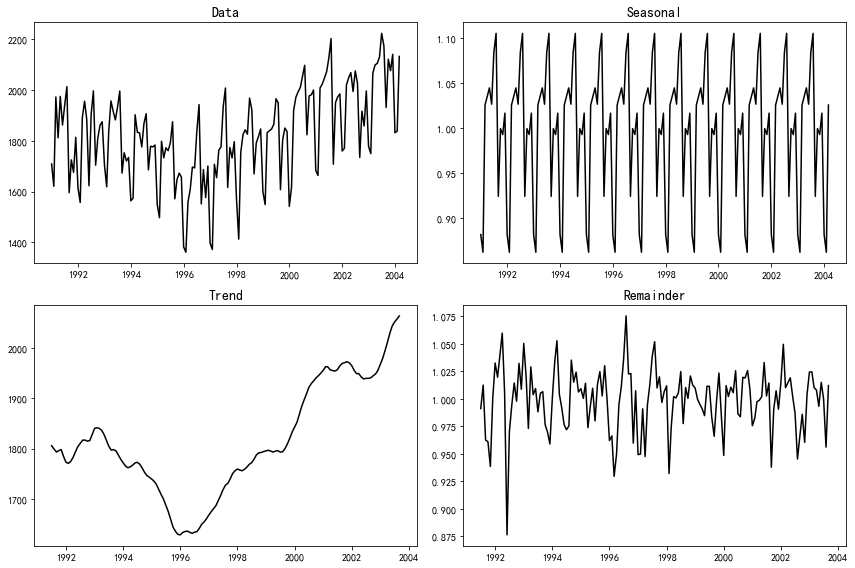

In [166]:
fig, ax_arr = plt.subplots(nrows=2, ncols=2, figsize=[12, 8],
                           sharex=False, sharey=False)
for i, (y_lab, y_val) in enumerate(stl_lines.items()):
    ax = ax_arr.flat[i]
    ax.plot(y_val, color='k')
    ax.set_title(y_lab, size=14)
fig.tight_layout()

**偏自相关**

**补充偏自相关和自相关的定义**

In [153]:
pacorr, pacorr_ci = sm.tsa.stattools.pacf(amtrak, nlags=3, alpha=0.05)
for i, pacorr_i in enumerate(pacorr):
    pacorr_ci_i = pacorr_ci[i]
    print('Partial:\nLag %i: %.3f with CI (%.3f, %.3f)'%(i, pacorr_i, *pacorr_ci_i))
    # also print autocorr
    print('Auto:\nLag %i: %.3f with CI (%.3f, %.3f)'%(i, autocorr[i], *confint[i]))
    print('-*-*-*-*'*5)

Partial:
Lag 0: 1.000 with CI (1.000, 1.000)
Auto:
Lag 0: 1.000 with CI (1.000, 1.000)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Partial:
Lag 1: 0.563 with CI (0.408, 0.719)
Auto:
Lag 1: 0.560 with CI (0.404, 0.715)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Partial:
Lag 2: 0.062 with CI (-0.093, 0.218)
Auto:
Lag 2: 0.355 with CI (0.157, 0.554)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Partial:
Lag 3: 0.208 with CI (0.053, 0.364)
Auto:
Lag 3: 0.360 with CI (0.147, 0.573)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


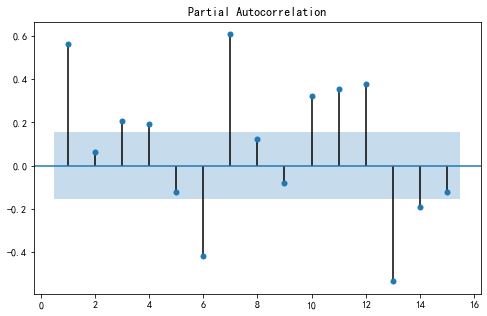

In [154]:
# the shaded region is the 95% CI
fig, ax = plt.subplots(figsize=[8, 5])
_ = sm.graphics.tsa.plot_pacf(amtrak, lags=15, ax=ax, zero=False)

好了，接下来的问题是，为什么我们需要这个部分自相关的概念？我们如何利用它进行时间序列分析？
正如我们稍后将看到的，它与时间序列预测的自回归模型紧密相连。

最后，值得一提的是，有一种特殊类型的时间序列数据叫做白噪声。正如它的名字所暗示的，这样的时间序列值是随机的，因此没有任何固定模式。为了统计地描述它，我们只需要检查时间序列是否具有序列相关性。例如，我们刚刚使用的amtrak数据显然不是白噪声。<p>
我们可以通过随机采样轻松生成一系列白噪声：

In [157]:
white_noise = np.random.normal(0, 1, 1000)

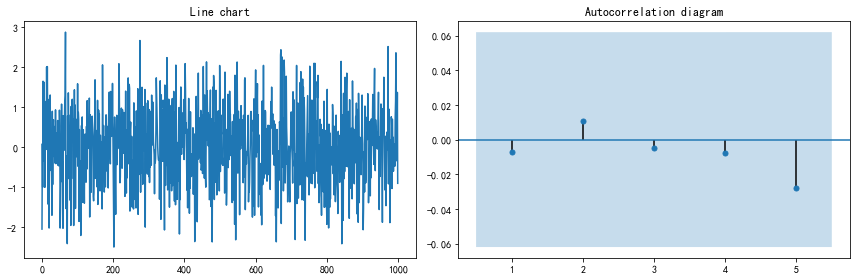

In [158]:
fig, (ax_line, ax_corr) = plt.subplots(figsize=[12, 4], ncols=2)
_ = ax_line.plot(np.arange(white_noise.size), white_noise)
ax_line.set_title('Line chart')
_ = sm.graphics.tsa.plot_acf(white_noise, lags=5, ax=ax_corr, zero=False)
ax_corr.set_title('Autocorrelation diagram')
fig.tight_layout()

## **10.5.2 ARIMA模型基本原理**

**ARIMA模型定义：**ARIMA模型全称为自回归积分滑动平均模型(Autoregressive Integrated Moving Average Model,简记ARIMA)，其中ARIMA(p,d,q)称为差分自回归移动平均模型，AR是自回归，p为自回归项；MA为移动平均,q为移动平均项数，d为时间序列成为平稳时所做的差分次数。所谓ARIMA模型，是指将非平稳时间序列转化为平稳时间序列，然后将因变量仅对它的滞后值以及随机误差项的现值和滞后值进行回归所建立的模型。ARIMA模型根据原序列是否平稳以及回归中所含部分的不同，包括移动平均过程（MA）、自回归过程（AR）、自回归移动平均过程（ARMA）、ARIMA过程以及其它衍生的ARIMA模型。<p>

### 1. 自回归模型 AutoRegressive models (AR)

当我们激发指数平滑的想法时，我们遵循的直觉是，可以通过使用历史模式来预测未来时间序列值。
此外，指数平滑方法假设，随着时间序列在历史上的进一步后退，过去时间序列的影响将减弱。

现在暂停一下——尽管乍一看很合理，但这个假设真的有必要吗？
换言之，我们如何尝试解除这个限制以增加模型的灵活性？
在这种情况下，我们实际上可以编写以下预测模型：

**（1）AR模型形式：**$$X_t=\phi_0+\phi_1X_{t-1}+\phi_2X_{t-2}+…+\phi_pX_{t-p}+\varepsilon_t$$其含义是指一个时间序列${X_t},(t=1,2,…,T)$，如果可以表示为上述形式，即对于任意时刻的$X_t$可以表示为t-p时刻X的线性函数，类似于一个线性回归的形式，则称该时间序列为P阶自回归模型，记作AR(p)。其中，$\phi_i$为自回归系数，$\varepsilon_t$为白噪声，p为滞后阶数，根据p的不同，AR模型可分为一阶自回归模型AR(1)，二阶自回归模型AR(2)等。<p>

**（2）AR模型假设:**<br>
(a) $X_t$与${X_{𝑡−1},𝑋_{𝑡−2},…,𝑋_{𝑡−𝑝}}$存在线性关系；<br>
(b) $\varepsilon_t\sim𝑁(0,\sigma^2)$,即残差项$\varepsilon_t$服从正态分布；<br>
(c) $\varepsilon_t$与$X_{𝑡−𝑝},(p=1,2,3,…)$独立，不存在自相关现象。<p>

In [35]:
# train/test split
N_train = int(0.8*amtrak.size)
N_test = amtrak.size - N_train
amtrak_train = amtrak[:N_train]
amtrak_test = amtrak[N_train:]

In [9]:
# set a small p
from statsmodels.tsa.ar_model import AutoReg
p = 1
ar_p = AutoReg(amtrak_train, lags=p, seasonal=False).fit()

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
result = ar_p.summary()
result.tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,889.4105,140.756,6.319,0.000,613.535,1165.286
Ridership.L1,0.5018,0.079,6.368,0.000,0.347,0.656


In [11]:
ar_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              Ridership   No. Observations:                  127
Model:                     AutoReg(1)   Log Likelihood                -805.182
Method:               Conditional MLE   S.D. of innovations            144.228
Date:                Fri, 03 Mar 2023   AIC                           1616.364
Time:                        17:45:58   BIC                           1624.873
Sample:                    02-01-1991   HQIC                          1619.821
                         - 07-01-2001                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          889.4105    140.756      6.319      0.000     613.535    1165.286
Ridership.L1     0.5018      0.079      6.368      0.000       0.347       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9927           +0.0000j            1.9927            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


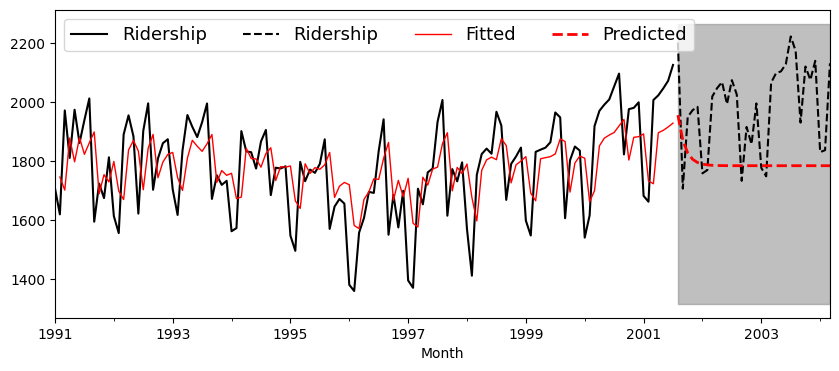

In [12]:
fig, ax = plt.subplots(figsize=[10, 4])
amtrak_train.plot(color='k', label='Train', ax=ax)
amtrak_test.plot(color='k', ax=ax, linestyle='dashed', label='Test')
ar_p.fittedvalues.plot(ax=ax, color='r',
                       ls='-', lw=1, label='Fitted')
ar_p.forecast(N_test).plot(ax=ax, color='r',
                           ls='--', lw=2, label='Predicted')
ax.fill_betweenx(x1=amtrak_test.index[0], x2=amtrak_test.index[-1],
                 y=ax.get_ylim(), color='gray', alpha=0.5)
ax.legend(prop={'size': 13}, loc=2, ncol=4)
#ax.plot(ar_p.forecast(N_test), color='r', ls='--', lw=2)

显然，假设估计参数为0.5018，下降趋势是可以想象的，这意味着一步预测总是略小于先前的值，恒定趋势为889.4105。
正如我们稍后将看到的，AR（p）实际上是属于自回归模型的一种特殊（和简化）情况。
因此，我们可以使用更通用的api [`SARIMAX`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX):

In [13]:
# set a small p
ar_p_ = sm.tsa.SARIMAX(amtrak_train, order=(p, 0, 0), trend='c').fit(disp=False)
ar_p_.params

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


intercept      889.410503
ar.L1            0.501311
sigma2       20801.725144
dtype: float64

注意：两者唯一的区别是趋势项的设置 `trend`: 
- 在 `AutoReg`中, 默认添加AR模型中的常量项
- 在 `SARIMAX`中, 我们需要手动设置 `trend='c'` 以在AR模型中添加常量项

最后，我们可以很容易地检查两个模型的预测结果之间是否存在很高的相关性，因为它们本质上是相同的模型：

In [14]:
SP_STATS.pearsonr(ar_p.fittedvalues, ar_p_.fittedvalues[1:])

(1.0, 0.0)

### 阶数选择

正如我们前面提到的，选择合适的顺序可以基于对自回归的检验。
特别是，由于AR模型中参数的解释，我们可能需要查看PACF图。似乎6或7可能是`p`的一个很好的候选值

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


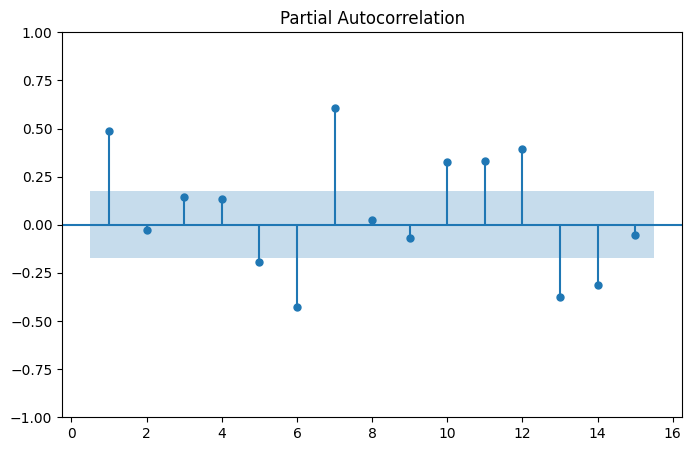

In [15]:
# the shaded region is the 95% CI
fig, ax = plt.subplots(figsize=[8, 5])
_ = sm.graphics.tsa.plot_pacf(amtrak_train, lags=15, ax=ax, zero=False)

In [39]:
p = 7
ar_p_pacf = sm.tsa.SARIMAX(amtrak_train, order=(p, 0, 0), trend='c').fit(disp=False)

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
# sigma2: https://github.com/statsmodels/statsmodels/issues/e507
ar_summary = ar_p_pacf.summary().tables[1]
ar_summary

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,395.3104,164.905,2.397,0.017,72.102,718.519
ar.L1,0.7228,0.070,10.324,0.000,0.586,0.860
ar.L2,0.0077,0.073,0.105,0.916,-0.136,0.151
ar.L3,-0.0318,0.089,-0.359,0.719,-0.205,0.142
ar.L4,0.1244,0.069,1.794,0.073,-0.012,0.260
ar.L5,0.0457,0.073,0.624,0.533,-0.098,0.189
ar.L6,-0.7274,0.076,-9.533,0.000,-0.877,-0.578
ar.L7,0.6378,0.070,9.111,0.000,0.501,0.775
sigma2,9218.2927,1320.370,6.982,0.000,6630.416,1.18e+04


这一结果可能与我们之前的结论一致，即在滞后4处存在高自相关的情况下，存在4的季节性周期。让我们比较一下不同的`p`值的预测结果：

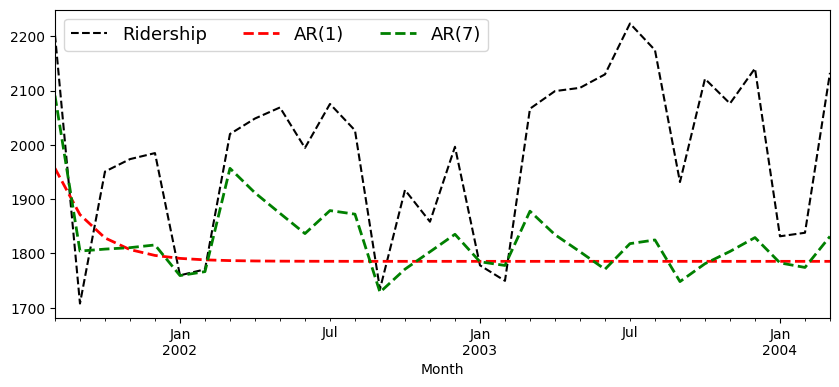

In [52]:
fig, ax = plt.subplots(figsize=[10, 4])
amtrak_test.plot(color='k', ax=ax, linestyle='dashed', label='Test')
ar_p.forecast(N_test).plot(ax=ax, color='r',
                           ls='--', lw=2, label='AR(1)')
N_test = 32
ar_p_pacf.forecast(N_test).plot(ax=ax, color='g',
                                ls='--', lw=2, label='AR(7)')
ax.legend(prop={'size': 13}, loc=2, ncol=3)

我们可以通过计算均方误差直接比较预测误差：

In [55]:
ar_p_mse = metrics.mean_squared_error(y_pred=ar_p_.forecast(N_test).values, y_true=amtrak_test.values)
ar_p_pacf_mse = metrics.mean_squared_error(y_pred=ar_p_pacf.forecast(N_test).values, y_true=amtrak_test.values)
print('AR(1) vs. AR(7): %.3f vs. %.3f'%(ar_p_mse, ar_p_pacf_mse))

AR(1) vs. AR(7): 58144.767 vs. 41458.240


最后，为了保持一个更简单的模型，我们可以尝试用带有统计显著系数的订单来重新训练我们的模型（但需要使用[`AutoReg`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.AutoReg.html#statsmodels.tsa.ar_model.AutoReg) api）:

In [56]:
p = [1, 6, 7]

In [57]:
ar_p_subset = sm.tsa.AutoReg(amtrak_train, lags=p, trend='c', seasonal=False).fit()
ar_p_subset_mse = metrics.mean_squared_error(y_pred=ar_p_subset.forecast(N_test).values,
                                         y_true=amtrak_test.values)
print('AR(1) vs. AR(7) vs. AR(%s): %.3f vs. %.3f vs. %.3f'%(p, ar_p_mse, ar_p_pacf_mse, ar_p_subset_mse))

AR(1) vs. AR(7) vs. AR([1, 6, 7]): 58144.767 vs. 41458.240 vs. 50071.267


C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


显然，AR（7）模型仍然是最好的。

### 2. 自回归移动平均模型 AutoRegressive Moving Average (ARMA)

在本节中，我们将进一步完善简单的AR模型。我们首先介绍一个叫做移动平均模型（MA）的模型。

#### 移动平均模型 Moving average (MA)

首先，这个名称令人困惑——它与移动平均平滑没有任何相似之处，后者是一种通过在相邻时间点之间进行平均来消除某个时间序列观测值的数据处理技巧。<p>
相反，MA模型是一种将未来时间序列值建模为先前预测误差的线性组合的预测方法，其思想是可以根据过去的错误预测未来值。

**（1）MA模型形式：**$X_t=\varepsilon_t-\phi_1\varepsilon_{t-1}-\phi_2\varepsilon_{t-2}-…-\phi_q\varepsilon_{t-q}$，其含义是时间序列t时刻的响应值$X_𝑡$与其前$t-q$时刻的残差存在线性关系，$\varepsilon_t$为白噪声，称该模型为移动平均模型($MA(q)$模型)。<p>

**（2）MA模型假设:**<br>
(a) $X_𝑡$与$\varepsilon_{t-1},\varepsilon_{t-2},…,\varepsilon_{t-q}$存在线性关系,与$\varepsilon_{t-q-1}$及之后的扰动项无关；<br>
(b) $\varepsilon_t\sim𝑁(0,\sigma^2)$,即残差项$\varepsilon_t$服从正态分布；<br>
(c) $\varepsilon_t$与$\varepsilon_{t-q}(q=1,2,3,…)$独立，不存在自相关现象。<p>

为了实现这个模型，我们可以通过对模型设置进行小小的修改，使用相同的api调用该模型：

In [58]:
# set a small q
q = 1
ma_q = sm.tsa.SARIMAX(amtrak_train, order=(0, 0, q), trend='c').fit(disp=False)

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
metrics.mean_squared_error(y_pred=ma_q.forecast(N_test), y_true=amtrak_test.values)

59562.52136196963

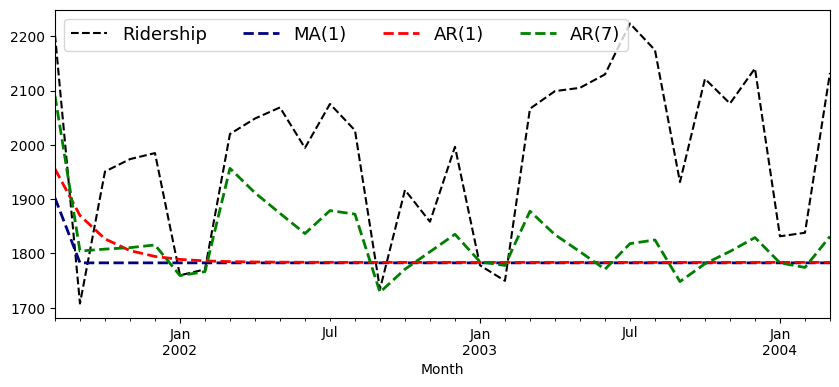

In [60]:
fig, ax = plt.subplots(figsize=[10, 4])
amtrak_test.plot(color='k', ax=ax, linestyle='dashed', label='Test')
ma_q.forecast(N_test).plot(ax=ax, color='navy',
                           ls='--', lw=2, label='MA(1)')
ar_p_.forecast(N_test).plot(ax=ax, color='r',
                           ls='--', lw=2, label='AR(1)')
ar_p_pacf.forecast(N_test).plot(ax=ax, color='g',
                             ls='--', lw=2, label='AR(7)')
ax.legend(prop={'size': 13}, loc=2, ncol=4)

### MA模型的定阶

事实证明，MA模型的模型选择过程与AR模型非常相似，只是我们应该关注ACF图而不是PACF。
如果你对技术细节感兴趣，这里有一个很好的视频供你参考： [Time Series Talk : Moving Average and ACF](https://youtu.be/_tgB-ri9-8c)

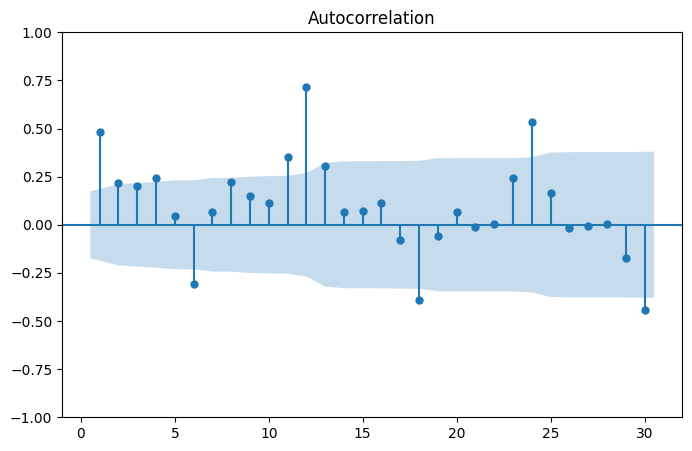

In [61]:
# the shaded region is the 95% CI
fig, ax = plt.subplots(figsize=[8, 5])
_ = sm.graphics.tsa.plot_acf(amtrak_train, lags=30, ax=ax, zero=False)

In [65]:
# 基于ACF图将q设置为6
q = 6
ma_acf = sm.tsa.SARIMAX(amtrak_train, order=(0, 0, q), trend='c').fit(disp=False)

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
metrics.mean_squared_error(y_pred=ma_q.forecast(N_test), y_true=amtrak_test.values)

59562.52136196963

In [64]:
metrics.mean_squared_error(y_pred=ma_acf.forecast(N_test), y_true=amtrak_test.values)

58500.76227532585

模型性能较差归因于数据的非平稳性。正如我们将在ARIMA部分看到的那样，差分之后性能将会变好。

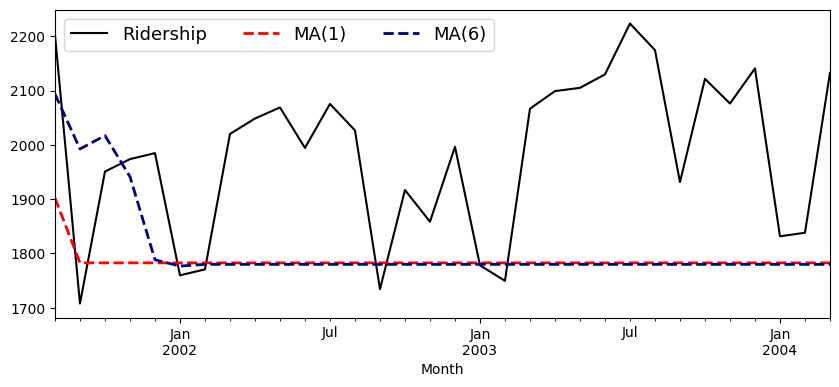

In [67]:
fig, ax = plt.subplots(figsize=[10, 4])
amtrak_test.plot(color='k', ax=ax, label='Test')
ma_q.forecast(N_test).plot(ax=ax, color='red',
                           ls='--', lw=2, label='MA(1)')
ma_acf.forecast(N_test).plot(ax=ax, color='navy',
                           ls='--', lw=2, label='MA(6)')
ax.legend(prop={'size': 13}, loc=2, ncol=4)

### 3. ARMA模型

ARMA模型显然是AR（p）和MA（q）模型的简单集合。

**（1）ARMA模型形式：**$X_t=\phi_0+\phi_1X_{t-1}+\phi_2X_{t-2}+…+\phi_pX_{t-p}+\varepsilon_t-\phi_1\varepsilon_{t-1}-\phi_2\varepsilon_{t-2}-…-\phi_q\varepsilon_{t-q}$，其含义是时间序列t时刻的响应值$X_𝑡$与前t-p时刻的响应值以及其前t-q时刻的残差均存在线性关系，$\varepsilon_t$为白噪声，称该模型为自回归移动平均模型（ARMA(p,q)模型）。ARMA(1,1)即当p和q均滞后一阶时的ARMA模型。<p>
    
**（2）ARMA模型假设**<br>
(a) $X_𝑡$与${X_{𝑡−1},𝑋_{𝑡−2},…,𝑋_{𝑡−𝑝}}$和${\varepsilon_{𝑡−1},\varepsilon_{𝑡−2},…,\varepsilon_{𝑡−𝑞}}$均存在线性关系；<br>
(b) $\varepsilon_t\sim𝑁(0,\sigma^2)$,即残差项$\varepsilon_t$服从正态分布；<br>
(c) $\varepsilon_t$与$\varepsilon_{t-q}(q=1,2,3,…)$独立，不存在自相关现象。<p>

要运行此模型，只需分别指定$p$和$q$：

In [68]:
p, q = 7, 6
arma = sm.tsa.SARIMAX(amtrak_train, order=(p, 0, q), trend='c').fit(disp=False, maxiter=1e5)

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [69]:
metrics.mean_squared_error(y_pred=arma.forecast(N_test), y_true=amtrak_test.values)

42911.40262319229

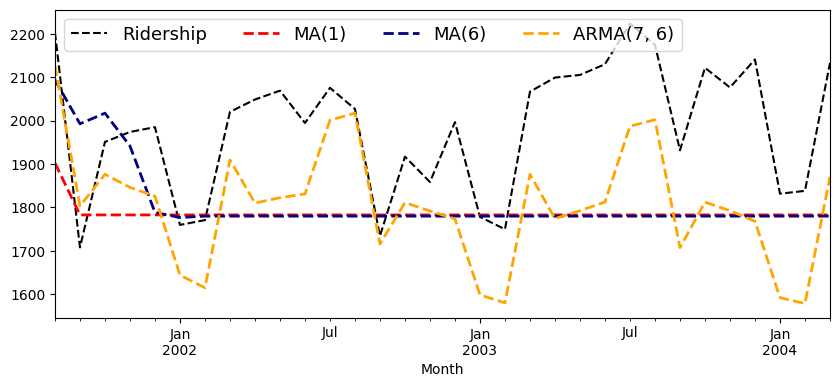

In [70]:
fig, ax = plt.subplots(figsize=[10, 4])
amtrak_test.plot(color='k', ax=ax, linestyle='dashed', label='Test')
ma_q.forecast(N_test).plot(ax=ax, color='red',
                           ls='--', lw=2, label='MA(1)')
ma_acf.forecast(N_test).plot(ax=ax, color='navy',
                           ls='--', lw=2, label='MA(6)')
arma.forecast(N_test).plot(ax=ax, color='orange',
                           ls='--', lw=2, label='ARMA(7, 6)')
ax.legend(prop={'size': 13}, loc=2, ncol=4)

###  3. AR-Integrated-MA (ARIMA)

**静态和差分**

那么，上述预测的共同问题是什么？是的，显然没有捕捉到季节性或趋势！换句话说，这些模型假设时间序列数据是静态的。
为了刷新我们的记忆，让我们看看<font color='red'>第7周我们是如何定义这个概念的</font>：
> ... 一个非平稳的时间序列，如果有任何趋势或季节性的模式。。。

此外，我们还讨论了如何使用差分将非平稳时间序列转换为平稳时间序列：

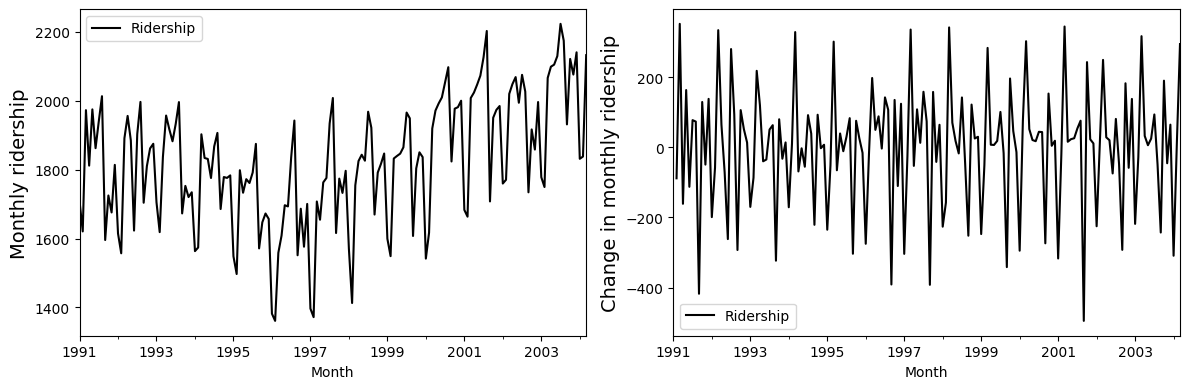

In [71]:
fig, (ax1, ax2) = plt.subplots(figsize=[12, 4], ncols=2)
amtrak.plot(color='k', ax=ax1)
ax1.set_ylabel('Monthly ridership', size=14)
amtrak.diff(1).plot(color='k', ax=ax2)
ax2.set_ylabel('Change in monthly ridership', size=14)
fig.tight_layout()

可视化意味着，考虑到右侧不同乘客量的白噪声模式，通过差分确实消除了数据的一些非平稳性。
回想一下，我们可以进一步使用KPSS测试来补充验证：

In [72]:
pval = sm.tsa.stattools.kpss(amtrak, nlags='auto')[1]
pval_diff = sm.tsa.stattools.kpss(amtrak.diff(1).dropna(), nlags='auto')[1]
print('Before differencing: %.3f'%pval)
print('After differencing: %.3f'%pval_diff)

Before differencing: 0.010
After differencing: 0.100


C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


p值告诉我们，在差分之前，我们能够拒绝amtrak数据是固定的假设。差分后，p值变为0.1，因此我们无法拒绝平稳性。

注意，当差分时间序列数据变成白噪声序列时，我们可能会得到一个随机游走（random walk）模型，因为差分值$y_t'=y_t-y_{t-1}$是随机的。
换句话说，我们可以将其重写为$y_t=y_{t-1}+\varepsilon_t$，其中$\varepsilon_t$只是白噪声。
注意，一次差分很可能仍然会导致非平稳时间序列。在这种情况下，我们可以进行第二次差分来计算差值。

最后，值得注意的是，这种lag-1差分本质上是一个描述的过程。
当某些模式有规律地出现（季节性，如季度或月度模式）时，我们可以在季节性滞后$m$的情况下进行差异化，即季节差异化（即de-seapersonality）：$y_t'=y_t-y_{t-m}$。
遵循随机游走预测模型，使用季节差异可能会导致使用同一季节的最新观测值进行一步超前预测，即$y_t=y_{t-m}+\varepsilon_t$。

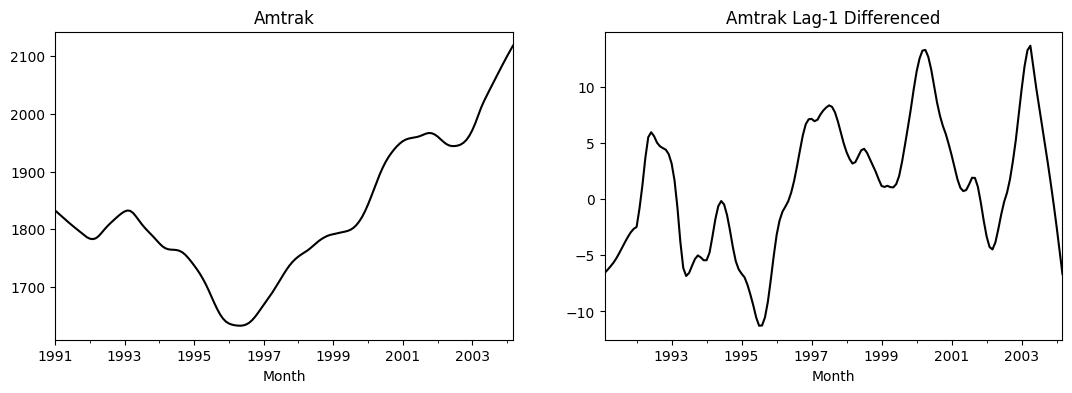

In [74]:
# compare the trend component
trend_nodiff = sm.tsa.STL(amtrak).fit().trend
trend_diff = sm.tsa.STL(amtrak.diff(1).dropna()).fit().trend
fig, (ax_nodiff, ax_diff) = plt.subplots(figsize=[13, 4], ncols=2)
# check out the scale: trend is removed significantly
trend_nodiff.plot(ax=ax_nodiff, color='k')
ax_nodiff.set_title('Amtrak')
trend_diff.plot(ax=ax_diff, color='k')
_ = ax_diff.set_title('Amtrak Lag-1 Differenced')

**ARIMA**

ARIMA实际上是ARMA模型与差分的结合：

差分：$\Delta^dY=Y_𝑡−Y_{𝑡−𝑑}$，d步差分；<br>
差分：$\Delta Y=Y_𝑡−Y_{𝑡−1}$，1阶差分；<br>
    $~~~~~~~~~~$$\Delta^2Y=\Delta Y_t−\Delta Y_{𝑡−1}$，2阶差分；<br>
    $~~~~~~~~~~$依次类推….<p>

**（1）ARIMA模型形式：**对于一个非平稳序列$Y_𝑡$，如果进行d阶差分后，形成新的序列$X_𝑡$是一个平稳序列，则称序列$Y_𝑡$为一个ARIMA（p,d,q）模型。表达式为：$\Delta^dY=\Delta^{d-1}Y_t-\Delta^{d-1}Y_{t-1}$，且令$X_t=\Delta^dY$，则$X_t=\phi_0+\phi_1X_{t-1}+\phi_2X_{t-2}+…+\phi_pX_{t-p}+\varepsilon_t-\phi_1\varepsilon_{t-1}-\phi_2\varepsilon_{t-2}-…-\phi_q\varepsilon_{t-q}$。此外，ARIMA还有一些其他形式，比如时间序列存在某种趋势，消除这种趋势后可以达到平稳。ARIMA的表达式可以表示为$X_𝑡=\nu_𝑡+\varepsilon_𝑡,\varepsilon_𝑡$服从正态独立同分布的要求，$\mu_𝑡$可以有多种形式，如$\mu_𝑡=a_0+a_1∗𝑡,\mu_𝑡=a_0+𝑎_1∗𝑡+𝑎_2∗𝑡^2$等。<p>
- 其自回归分量的阶数表示为 $p$
- 其移动平均分量的阶数表示为 $q$
- 差分次数表示为 $d$
    
**（2）模型假设**<br>
(a) $Y_𝑡$为非平稳序列，但经过差分后可以变为平稳序列，表示为$X_𝑡$；<br>
(b) $X_𝑡$与${X_{𝑡−1},𝑋_{𝑡−2},…,𝑋_{𝑡−𝑝}}$和${\varepsilon_{𝑡−1},\varepsilon_{𝑡−2},…,\varepsilon_{𝑡−𝑞}}$均存在线性关系；<br>
(c) $\varepsilon_t\sim𝑁(0,\sigma^2)$,即残差项$\varepsilon_t$服从正态分布；<br>
(d) $\varepsilon_t$与$\varepsilon_{t-q}(q=1,2,3,…)$和$X_{𝑡−𝑝}(p=1,2,3,…)$独立，不存在自相关。<p>

为了将其与更简单的模型联系起来，我们知道：
- ARIMA(0,0,0) 等于白噪声序列
- ARIMA(0,1,0) 等于随机游走模型
- ARIMA($p$,0,0) 等于 AR($p$)
- ARIMA(0,0,$q$) 等于 MA($q$)
- ARIMA($p$, 0, $q$) 等于 ARMA($p$,$q$)

现在，让我们尝试使用一些任意参数设置的模型：

In [76]:
p, d, q = 2, 0, 1
arima = sm.tsa.SARIMAX(amtrak_train, order=(p, d, q), trend='c').fit(disp=False)

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Ridership   No. Observations:                  127
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -811.309
Date:                Fri, 03 Mar 2023   AIC                           1632.618
Time:                        22:12:43   BIC                           1646.839
Sample:                    01-01-1991   HQIC                          1638.396
                         - 07-01-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    736.1844   1.04e+04      0.071      0.943   -1.96e+04    2.11e+04
ar.L1          0.6612     11.544      0.057      0.954     -21.965      23.288
ar.L2         -0.0739      5.734     -0.013      0.990     -11.313      11.165
ma.L1         -0.1700     11.547     -0.015      0.988     -22.802      22.462
sigma2      2.067e+04   3805.129      5.432      0.000    1.32e+04    2.81e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 6.85
Prob(Q):                              0.85   Prob(JB):                         0.03
Heteroskedasticity (H):               1.13   Skew:                            -0.50
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
metrics.mean_squared_error(y_pred=arima.forecast(N_test), y_true=amtrak_test.values)

58025.215203746295

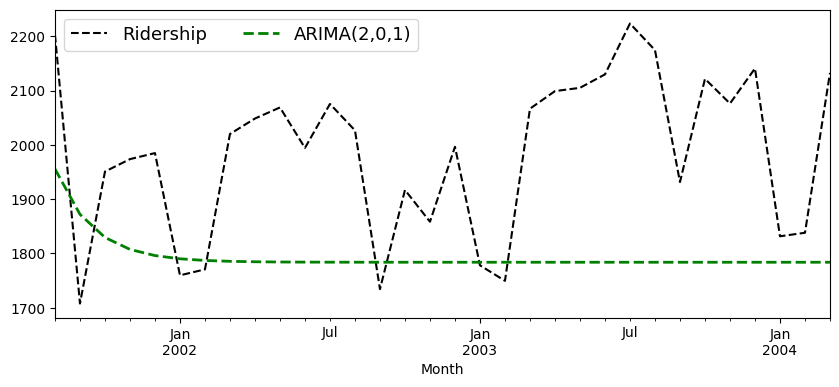

In [79]:
fig, ax = plt.subplots(figsize=[10, 4])
amtrak_test.plot(color='k', ax=ax, linestyle='dashed', label='Test')
arima.forecast(N_test).plot(ax=ax, color='g',
                           ls='--', lw=2, label='ARIMA(%i,%i,%i)'%(p,d,q))
#arma.forecast(N_test).plot(ax=ax, color='r',
#                           ls='--', lw=2, label='ARMA(4,1)')
ax.legend(prop={'size': 13}, loc=2, ncol=5)

**ARIMA(p,d,q)模型的确定原则：**<br>
- 参数d的确定原则：通过几阶差分的平稳性来确定d<br>
- p和q的确定原则如下：<br>

| 模型 | 自相关系数 | 偏自相关系数 |
| :----------: | :----------:| :----------: |
| p有取值，q=0  | 拖尾（不是很快衰减为0）| p阶之后截尾（根据截尾情况确定p） |
| p=0，q有取值  | q阶之后截尾（根据截尾情况确定q） | 拖尾（不是很快衰减为0）| 
| p，q有取值    | 拖尾（不是很快衰减为0） | 拖尾（不是很快衰减为0）         | 


**Python相关函数: statsmodel内置函数**<br>
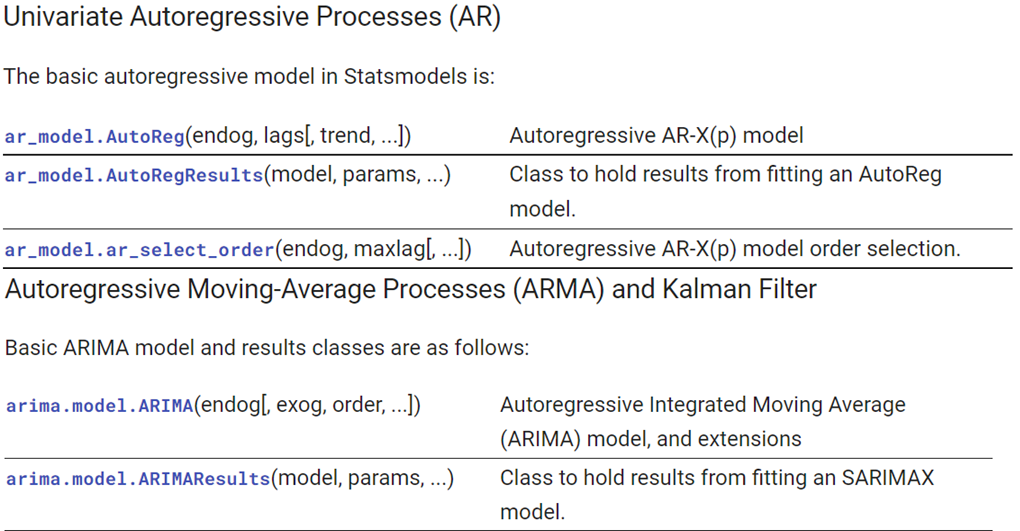

## **10.5.3 平稳性检验**

平稳性是某些时间序列所具有的的特征，一个平稳的序列意味着其均值、方差和协方差不随时间变化。

**1.平稳性检验的方法**<p>
（1）单位根检验。如果序列平稳，就不存在单位根，如果序列非平稳，则存在单位根。如何检验序列是否存在单位根，又可以分为DF检验和ADF检验两种方法。<br>
    $~~~~~~~$ 1）DF检验（Dickey-Fuller test）。这里的零假设是TS是非平稳的。测试结果包括一个测试统计量和一些不同置信水平的临界值。如果“检验统计量”小于临界值，我们可以拒绝无效假设，并认为序列是平稳的。<p>  有无统计量 原假设 备择假设
    $~~~~~~~$ 2）ADF检验（Augmented Dickey-Fuller test）。ADF检验和迪基-福勒检验类似，但ADF检验的好处在于它排除了自相关的影响。DF检验只能应用于一阶情况，当序列存在高阶的滞后相关时，可以使用ADF检验，所以说ADF是对DF检验的扩展。<p>
（2）绘图法。可以通过绘图的方式观察序列的均值是否保持一致，但是这种方法不严格。

**2.非平稳序列平稳化的方法**

**1.通过差分平稳化。**差分是最常用的平稳化方法。理论上，经过足够阶数的差分之后任何时间序列都会变成稳定的，但是高于二阶的差分较少使用：每次差分会丢失一个观测值，丢失数据中所包含的一部分信息。一阶差分得到增长率，二阶差分得到增长率的增长率，而高阶差分则暂时没有明确的解释。<p>
**2.去除趋势平稳化。**去趋势是指消除数据中的线性趋势或者高阶趋势的过程，可以进行一个关于常数、时间t的线性或多项式回归，从回归中得到的残差代表去趋势的时间序列。<p>
**3.结构变换平稳化。**例如通过取对数的方式处理一些非线性趋势序列，或是将序列的指数趋势转换为线性趋势。除此之外，还可以采用指数转换等方法将原来时间序列映射成不同的曲线形态。<p>

<font color='blue'>**【例10.5.3-1】**</font><br>

Text(0, 0.5, 'pm2.5')

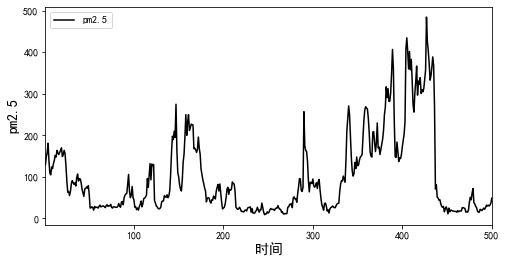

In [111]:
import pandas as pd

pm = pd.read_csv(".\data_chap10\pm2.5.csv",index_col='time')

fig, ax = plt.subplots(figsize=[8, 4])
pm.plot(ax=ax, color='k')
ax.set_xlabel('时间', size=14)
ax.set_ylabel('pm2.5', size=14)

Text(0, 0.5, 'pm2.5（差分）')

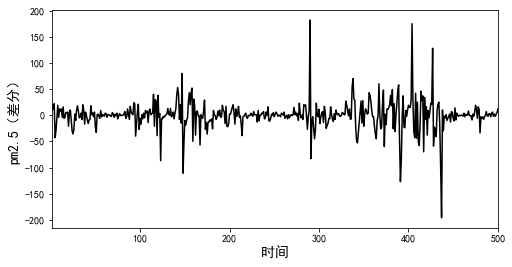

In [112]:
# 观察时间序列趋势
#一阶差分
plt.rcParams['axes.unicode_minus']=False 
diff_pm = pm['pm2.5'].diff(1)##1阶差分

fig, ax = plt.subplots(figsize=[8, 4])
diff_pm.plot(ax=ax, color='k')
ax.set_xlabel('时间', size=14)
ax.set_ylabel('pm2.5（差分）', size=14)

<font color='blue'>**【例10.5.3-2】**</font><br>

Text(0, 0.5, '乘客量')

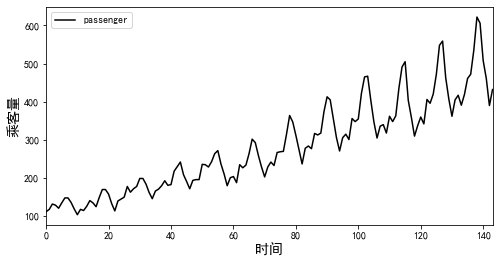

In [113]:
import pandas as pd
data = pd.read_csv('.\data_chap10\passengers.csv')

fig, ax = plt.subplots(figsize=[8, 4])
data.plot(ax=ax, color='k')
ax.set_xlabel('时间', size=14)
ax.set_ylabel('乘客量', size=14)

Text(0, 0.5, '乘客量（差分）')

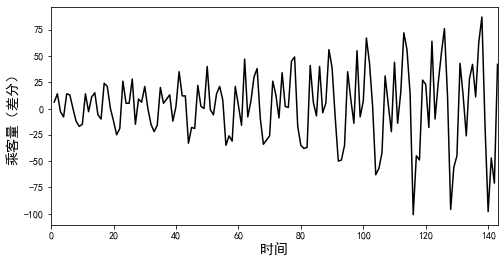

In [114]:
#差分
data1= data['passenger'].diff(1)##1阶差分

fig, ax = plt.subplots(figsize=[8, 4])
data1.plot(ax=ax, color='k')
ax.set_xlabel('时间', size=14)
ax.set_ylabel('乘客量（差分）', size=14)

### **ARIMA模型实例**

In [115]:
# 读入数据
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
###载入数据
import pandas as pd
data = pd.read_csv(".\data_chap10\pm2.5.csv",index_col='time')

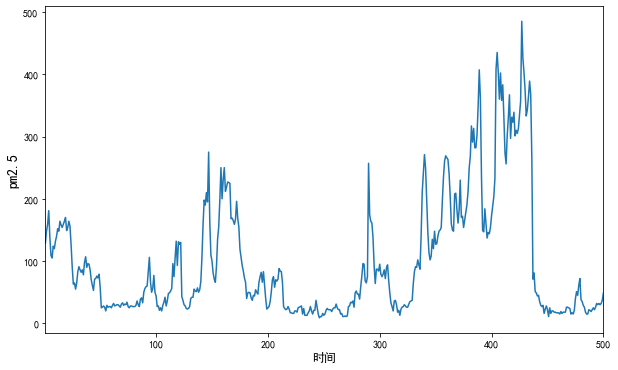

In [116]:
# 绘制时间序列图
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
data["pm2.5"].plot()
plt.xlabel('时间',fontsize=12,verticalalignment='top')
plt.ylabel('pm2.5',fontsize=14,horizontalalignment='center')
plt.show()

In [117]:
# 单位根检验
#进行ADF检验
temp = np.array(data["pm2.5"])
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])

output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
                           
output

,value
Test Statistic Value,-3.22629
p-value,0.0185127
Lags Used,3
Number of Observations Used,496
Critical Value(1%),-3.4436
Critical Value(5%),-2.86738
Critical Value(10%),-2.56988


p值大于0.01，说明该序列存在单位根，即为非平稳序列。<p>
对原序列进行一阶差分变换。

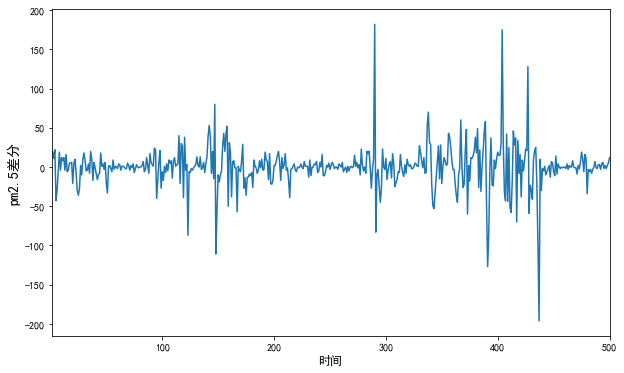

In [118]:
#差分
data1= data["pm2.5"].diff(1)##1阶差分
plt.figure(figsize=(10, 6))
data1.plot()
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.xlabel('时间',fontsize=12,verticalalignment='top')
plt.ylabel('pm2.5差分',fontsize=14,horizontalalignment='center')
plt.show()

In [119]:
#差分序列的ADF平稳性检验
temp = np.diff(data["pm2.5"])
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-8.71023
p-value,3.60779e-14
Lags Used,12
Number of Observations Used,486
Critical Value(1%),-3.44388
Critical Value(5%),-2.86751
Critical Value(10%),-2.56995


p值小于0.01，说明该序列不存在单位根，即为平稳序列。<p>
**查看acf和pacf：**

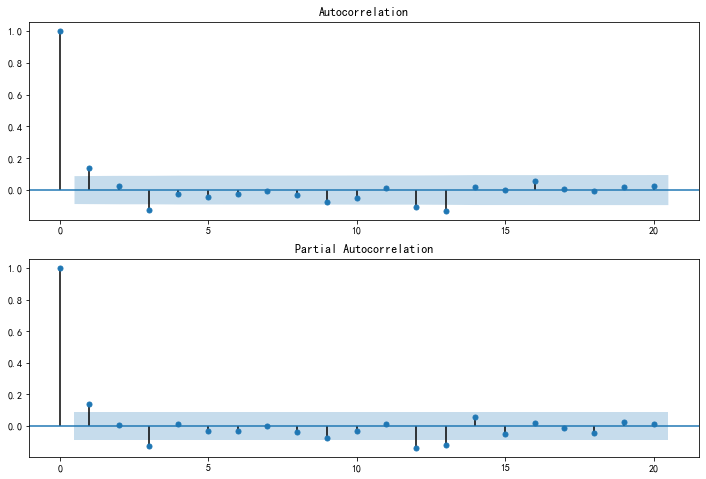

In [121]:

##修改格式
#将差分序列改为与原始数据相同的数据格式
pm = list(np.diff(data["pm2.5"]))
data2 = {
    "时间":data1.index[1:],  #第一个是空值，从第2个开始取
    "pm2.5":pm
}
df = pd.DataFrame(data2)
data_diff = df.set_index(['时间'], drop=True)#将时间设置为索引
data_diff.head()

#差分序列的acf,pacf
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_diff,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_diff,lags=20,ax=ax2)
plt.show()


根据自相关和偏自相关图，我们可以设置p=3，q=3。<p>
    
除了自相关和偏自相关图定阶外，还可以根据AIC、BIC自动定阶。<p>
例如：我们可以选取AIC为评价准则，限制AR最大阶不超过6，MA最大阶不超过4，自动实现模型定阶。

In [122]:
sm.tsa.arma_order_select_ic(data_diff,max_ar=6,max_ma=4,ic='aic')['aic_min_order']

D:\anoconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(4, 3)

定阶完成后，调用ARIMA()函数建立最终模型。

In [123]:
###例：将p,q分别设为4和3
p=4
q=3
model = ARIMA(data, (p,1,q)).fit()
model.summary()        #生成一份模型报告

D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.pm2.5   No. Observations:                  499
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2333.126
Method:                       css-mle   S.D. of innovations             25.884
Date:                Mon, 27 Feb 2023   AIC                           4684.251
Time:                        15:02:00   BIC                           4722.165
Sample:                             1   HQIC                          4699.130
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1002      0.171      0.587      0.558      -0.234       0.435
ar.L1.D.pm2.5     0.1532      0.063      2.421      0.016       0.029       0.277
ar.L2.D.pm2.5     0.0425      0.068      0.626      0.531      -0.091       0.176
ar.L3.D.pm2.5     0.7986      0.058     13.667      0.000       0.684       0.913
ar.L4.D.pm2.5    -0.1174      0.049     -2.405      0.017      -0.213      -0.022
ma.L1.D.pm2.5    -0.0304      0.044     -0.687      0.492      -0.117       0.056
ma.L2.D.pm2.5    -0.0371      0.045     -0.831      0.406      -0.125       0.050
ma.L3.D.pm2.5    -0.9324      0.038    -24.663      0.000      -1.007      -0.858
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5543           -0.9332j            1.0854           -0.3353
AR.2           -0.5543           +0.9332j            1.0854            0.3353
AR.3            1.0545           -0.0000j            1.0545           -0.0000
AR.4            6.8581           -0.0000j            6.8581           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.5199           -0.8956j            1.0356           -0.3337
MA.3           -0.5199           +0.8956j            1.0356            0.3337
-----------------------------------------------------------------------------
"""

查看拟合情况。

499


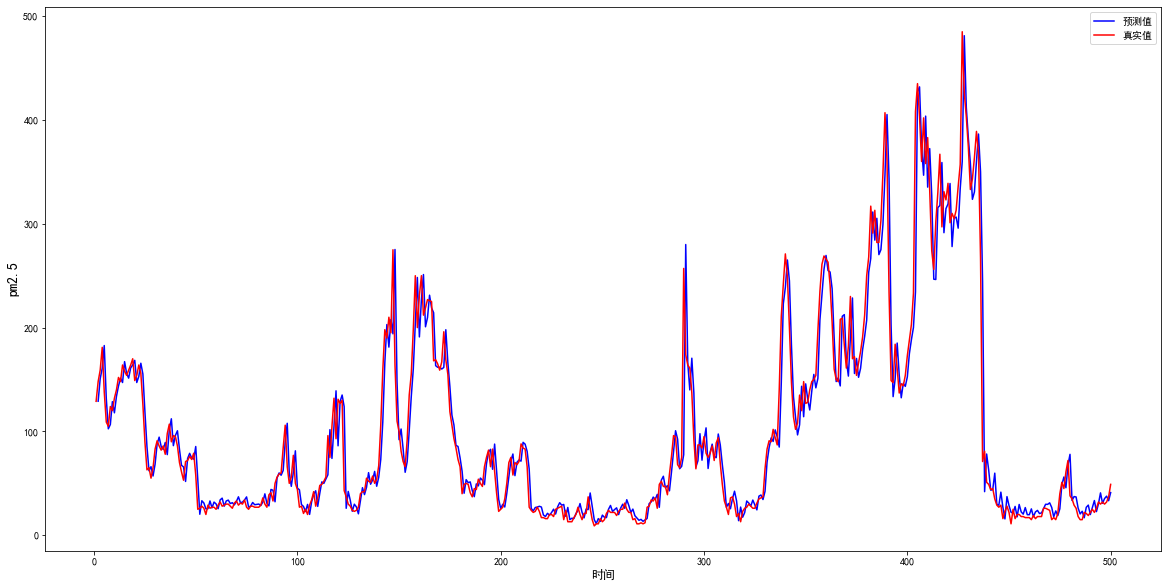

In [128]:
###拟合
predictions_ARIMA_diff = pd.Series(model.fittedvalues, copy=True)
#差分预测值和实际数据有时间错位，所以要进行修改
predictions = [i + j for i, j in zip(list(predictions_ARIMA_diff), list(data["pm2.5"]))]
print(len(predictions))
prediction_sales = {
    "时间":data1.index[1:],
    "pm2.5":predictions
}
prediction_sales = pd.DataFrame(prediction_sales) 
prediction_sales = prediction_sales.set_index(['时间'], drop=True)    
###拟合
plt.plot(prediction_sales,label="预测值",color='b')
plt.plot(data,label="真实值",color='r')
plt.xlabel('时间',fontsize=12,verticalalignment='top')
plt.ylabel('pm2.5',fontsize=14,horizontalalignment='center')
plt.legend()
plt.show()

预测。直接调用model.forecast ()预测：

In [129]:
model.forecast(5)   #为未来5天进行预测，返回预测结果，标准误差，和置信区间

(array([57.79872106, 59.64879761, 61.92682313, 67.98480938, 69.46677152]),
 array([25.88445199, 38.91856443, 48.95102462, 55.64364554, 61.20393728]),
 array([[  7.06612739, 108.53131472],
        [-16.630187  , 135.92778222],
        [-34.01542214, 157.8690684 ],
        [-41.07473185, 177.04435061],
        [-50.49074126, 189.4242843 ]]))

## **10.5.3 模型选择**

根据passenger的差分时间序列图、自相关系数图和偏自相关系数图确定p,d,q如下：<br>
(1) 一阶差分平稳，所以d=1；<br>
(2) 自相关系数和偏自相关系数同时拖尾，因此p, q都有取值；<br>
(3) 偏自相关系数和自相关稀疏拖尾，p最大值取10；自相关系数2期之后拖尾，所以q最大值取8。<p>
    
若采用ARIMA模型分析passenger这一数据,若不确定模型形式，可以根据截尾和拖尾的情况，先给定可能的模型形式如下：<br>
ARIMA(1,1,0)模型，先差分再AR(1)<br>
ARIMA(2,1,0)模型，先差分再AR(2)<br>
ARIMA(0,1,1)模型，先差分再MA(1)<br>
ARIMA(0,1,2)模型，先差分再MA(2)<br>
ARIMA(1,1,1)模型，先差分再ARMA(1,1)<br>
ARIMA(1,1,2)模型，先差分再ARMA(1,2)<br>
ARIMA(2,1,2)模型，先差分再ARMA(2,2)<br>
…
ARIMA(10,1,8)模型，先差分再ARMA(10,8)<br>

然后根据信息准则函数AIC和BIC来选择最优的ARIMA模型。
$$AIC(p)=N*ln(RSS)+2n$$
$$BIC=N*ln(RSS)+n*ln(N)$$
N为样本量，n为模型参数个数，RSS为预测误差。由于自相关系数和偏自相关系数同时拖尾，所以单纯选择AR模型和MA模型的效果不如使用ARMA模型的效果好。<p>

选择ARIMA参数时，有两种信息来源：
1. 从定性上来说，我们我们可以尝试查看ACF和PACF图。
2. 从定量上来说，我们可以尝试一系列候选值，然后选择表现最好的一个。

我们现在简要回顾基于ACF/PACF的方法。这两幅图可以分别为不同的成分AR和MA提供直观的证据。
- 值得注意的是，AR模型中的回归系数与PACF中估计的回归系数相等，因此，我们可以将PACF值的最大滞后阶数定为$p$。
- 同样，MA模型基于预测误差。产生非零ACF的最大滞后通常为MA中的$q$值。(https://youtu.be/_tgB-ri9-8c)供您参考。
- 最后，`I` 的部分是指差分的次数。

对于感兴趣的人来说，杜克大学的Robert Nau教授对ARIMA模型进行了非常详细的总结：[the guideline of model identification for ARIMA](https://people.duke.edu/~rnau/arimrule.htm).

让我们看看这个例子。鉴于我们知道从早期检查中发现数据存在一些趋势，我们希望进行去趋势（即，一阶差分）：

In [80]:
amtrak_train_diff = sm.tsa.statespace.tools.diff(amtrak_train, k_diff=1, k_seasonal_diff=0)

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


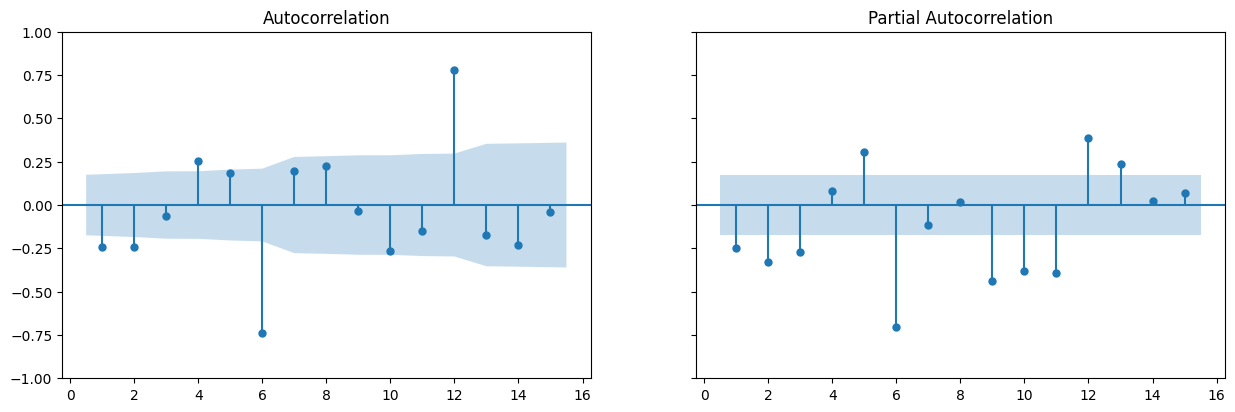

In [81]:
# the shaded region is the 95% CI
fig, (ax_acf, ax_pacf) = plt.subplots(figsize=[15, 4.5], ncols=2, sharey=True)
_ = sm.graphics.tsa.plot_acf(amtrak_train_diff, lags=15, ax=ax_acf, zero=False)
_ = sm.graphics.tsa.plot_pacf(amtrak_train_diff, lags=15, ax=ax_pacf, zero=False)

在本例中，我们可以尝试$q=6$和$p=6$。尽管如此，这可能比我们通常使用的要大一点。

最后，值得注意的是，通过一些包可以自动选择最佳性能参数。
在`statsmodels`中，有 [`statsmodels.tsa.x13.x13_arima_select_order`](https://www.statsmodels.org/devel/generated/statsmodels.tsa.x13.x13_arima_select_order.html#statsmodels.tsa.x13.x13_arima_select_order)。但是，这需要安装[`x13as`](https://www.census.gov/data/software/x13as.X-13ARIMA-SEATS.html)

In [82]:
p, d, q = 6, 1, 6
arima_mychoice = sm.tsa.SARIMAX(amtrak_train, order=(p, d, q), trend='c').fit(disp=False, maxiter=5000)

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


为了简单起见，我们尝试另一个随机选取的值：

In [83]:
p, d, q = 2, 0, 4
arima_rand = sm.tsa.SARIMAX(amtrak_train, order=(p, d, q), trend='c').fit(disp=False, maxiter=5000)

C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\huang\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


看看吧：我们的选择似乎很好！

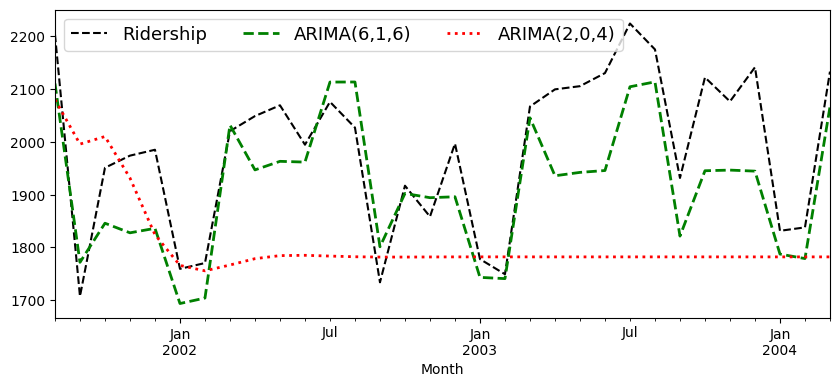

In [84]:
fig, ax = plt.subplots(figsize=[10, 4])
amtrak_test.plot(color='k', ax=ax, linestyle='dashed', label='Test')
arima_mychoice.forecast(N_test).plot(ax=ax, color='g',
                                     ls='--', lw=2, label='ARIMA(%i,%i,%i)'%(6, 1, 6))
arima_rand.forecast(N_test).plot(ax=ax, color='r',
                                 ls='dotted', lw=2, label='ARIMA(%i,%i,%i)'%(2, 0, 4))
ax.legend(prop={'size': 13}, loc=2, ncol=5)

In [85]:
metrics.mean_squared_error(y_pred=arima_mychoice.forecast(N_test), y_true=amtrak_test.values)

10589.256308519329

In [86]:
metrics.mean_squared_error(y_pred=arima_rand.forecast(N_test), y_true=amtrak_test.values)

57586.471498305604